# Simple Linear Regression

Linear regression is a supervised **Machine Learning (ML)** method where a dataset is modeled linearly. If there's only one predictor, the method is called as simple linear regression and a linear dependence is assumed between the response variable and the predictor.

Given a training dataset defined as:

$$
\mathrm{TD} = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\},
$$

the relationship is modeled as:

$$
y_i = \theta_0 + \theta_1 x_i,
$$

The goal is to find the set of parameters $\hat{\theta}_0, \hat{\theta}_1$ that best fit the dataset.

## `Python` Implementation (without libraries)

### Ordinary Least Squares

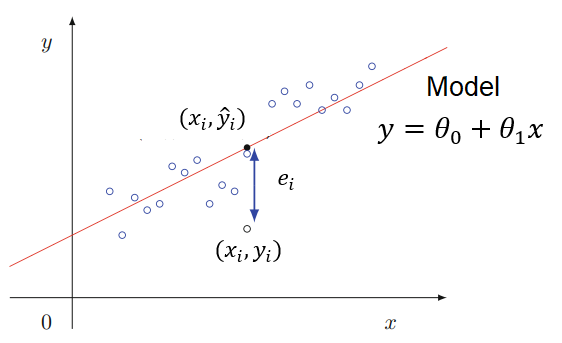

**Residual Sum of Squares (RSS)**

To estimate the parameters of the model that best fit our dataset, we introduce the **residual sum of squares (RSS)**. This measure is essential in the parameter fitting process using the ordinary least squares method. The RSS is defined as the sum of the squares of the residuals, where each residual represents the difference between the observed value and the value predicted by the model for each data point in the training set.

$$
\begin{split}
\text{RSS} :& = \sum_{i=1}^{N}e_i^2 \\
& = e_1^2 + e_2^2 + \cdots + e_N^2 \\
& = (y_1 - \theta_0 - \theta_1 x_1)^2 + (y_2 - \theta_0 - \theta_1 x_2)^2 + \cdots + (y_N - \theta_0 - \theta_1 x_N)^2 \\
& = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1 x_i)^2
\end{split}
$$

The best estimate will be the one that minimizes the sum of the squared residuals.

**Model fitting parameters**

To optimize the function $\text{RSS}(\theta_0, \theta_1)$, we must first identify its critical points. Then, by analyzing the Hessian matrix, we can classify them as maxima, minima, or saddle points.

**Critical Points**

$$
\nabla \text{RSS} (\theta_0, \theta_1) =
\bigg(\frac{\partial \text{RSS}}{\partial \theta_0}, \frac{\partial \text{RSS}}{\partial \theta_1}\bigg) = (0,0)
$$

$$
\begin{split}
& \frac{\partial \text{RSS}}{\partial \theta_0} = -2\sum_{i=1}^N(y_i - \theta_0 - \theta_1 x_i) = 0  \Rightarrow \sum_{i=1}^N y_i = N \,\hat{\theta}_0 + \hat{\theta}_1\sum_{i=1}^Nx_i \Rightarrow \hat{\theta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\theta}_1 \frac{\sum_{i=1}^N x_i}{N} = \boxed{\bar{y} - \hat{\theta}_1 \bar{x}}\\
& \frac{\partial \text{RSS}}{\partial \theta_1} = -2\sum_{i=1}^N(y_i - \theta_0 - \theta_1 x_i)x_i = 0 \Rightarrow \sum_{i=1}^N y_ix_i = \hat{\theta}_0 \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^Nx_i^2
\end{split}
$$

Therefore:

$$
\begin{split}
& \sum_{i=1}^N y_i x_i = \left( \bar{y} - \hat{\theta}_1 \bar{x} \right) \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^Nx_i^2 \\
& \sum_{i=1}^N y_ix_i  - \frac{\sum_{i=1}^N y_i\sum_{i=1}^N x_i}{N} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - \frac{\left( \sum_{i=1}^N x_i \right)^2}{N} \right] \\
& \sum_{i=1}^N y_ix_i - \frac{\sum_{i=1}^N y_i}{N}\sum_{i=1}^N x_i + \sum_{i=1}^N y_i\frac{\sum_{i=1}^N x_i}{N} - \frac{N}{N}\sum_{i=1}^N y_i\frac{\sum_{i=1}^N x_i}{N} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - N\left(\frac{ \sum_{i=1}^N x_i}{N} \right)^2\right] \\
& \sum_{i=1}^N y_ix_i - \bar{y}\sum_{i=1}^N x_i + \bar{x}\sum_{i=1}^N y_i - N\bar{y}\bar{x} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - N\bar{x}^2 - N\bar{x}^2 + N\bar{x}^2\right] \\
& \sum_{i=1}^N \left(x_i - \bar{x}\right)\left( y_i - \bar{y} \right) = \hat{\theta}_1\sum_{i=1}^N\left( x_i - \bar{x} \right)^2
\end{split}
$$

Finally, we get the following relations:

$$
\Rightarrow
\left\{
\begin{array}{l}
\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x} \\
\\
\hat{\theta}_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}
\end{array} \right.
$$


**Hessian (H):**

$$
\begin{split}
& \frac{\partial^2 \text{RSS}}{\partial \theta_0^2} = -2\sum_{i=1}^N(-1) = 2N\\
& \frac{\partial^2 \text{RSS}}{\partial \theta_1^2} = -2\sum_{i=1}^N(-x_i)x_i = 2\sum_{i=1}^Nx_i^2 \\
& \frac{\partial^2 \text{RSS}}{\partial \theta_0\theta_1} = -2\sum_{i=1}^N(-x_i) = 2\sum_{i=1}^Nx_i
\end{split}
$$

If $\textrm{det} (H) > 0$ (always positive) $\Rightarrow$ $H$ is positive definite $\Rightarrow$ $(\hat{\theta}_0, \hat{\theta}_1)$ corresponds to a minimum.

$$
H(\hat{\theta}_0, \hat{\theta}_1) \equiv \frac{\partial^2\text{RSS}}{\partial\vec{\theta}^2} =
\begin{bmatrix}
2N & 2 \sum x_i \\
2 \sum x_i & 2 \sum x_i^2
\end{bmatrix}
$$

$$
\textrm{det} \bigg(\frac{\partial^2\text{RSS}}{\partial\vec{\theta}^2} \bigg) = 4N \sum_{i=1}^Nx_i^2 - 4\left( \sum_{i=1}^Nx_i \right)^2 = 4N \sum (x_i - \bar{x})^2 = 4N \mathrm{Var}(x) > 0
$$

so, $(\hat{\theta}_0, \hat{\theta}_1)$ correspond to a minimum, i.e.:

$$\therefore \min\limits_{ \{ \theta_0, \theta_1 \}} \text{RSS} = \text{RSS}(\hat{\theta}_0, \hat{\theta}_1)$$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters of fitting
# =====================

def min_sqr(x,y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    theta_1 = np.dot(x - x_bar, y - y_bar) / np.linalg.norm(x - x_bar)**2
    theta_0 = y_bar - theta_1 * x_bar
    return [theta_1, theta_0]

# Data generation
# ===============

N = 1000

# Generate a random sample of size N from a normal (Gaussian) distribution,
# centered at 2 with a standard deviation of 1
a = np.random.normal(loc=2, scale=1, size=N)

# Randomly generate points around the line distributed normally
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

# Estimation coefficients
theta_1, theta_0 = min_sqr(x, y)
theta_1, theta_0

(2.090807221702084, 0.4534977387335109)

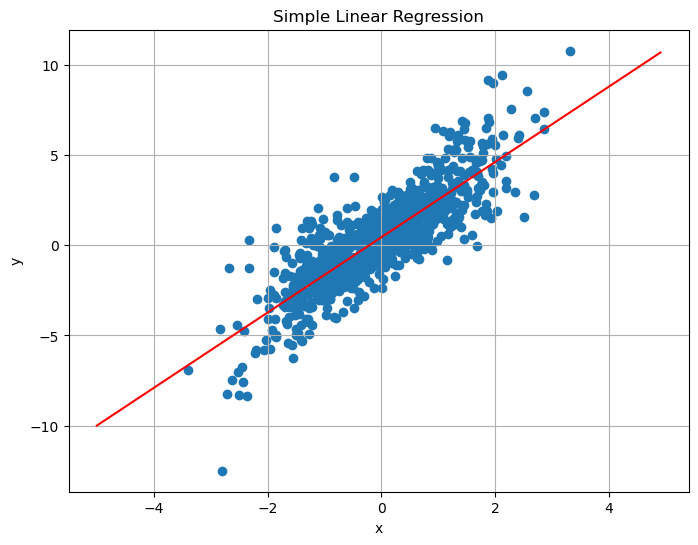

In [3]:
# Plot
# ====

x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq * theta_1 + theta_0

plt.figure(figsize=(8, 6))
plt.title("Simple Linear Regression")
plt.scatter(x, y) # Data
plt.plot(x_seq, y_pre, c="red") # Fitted line
plt.xlabel("x")
plt.ylabel("y")

plt.grid("True")
plt.show()

### Some Observations

It is important to distinguish between $e_i$, which represents the model residuals, and $\varepsilon_i$, which denotes the random errors. These concepts are fundamental for understanding the assumptions and quality of a regression model fit:

1. **Residuals ($e_i$) vs. Random Errors ($\varepsilon_i$)**:

   $$
   \boxed{
   e_i := \text{residuals} \neq \varepsilon_i := \text{random errors}
   }
   $$

   - **Residuals ($e_i$)**: The differences between observed values and the values predicted by the model. They quantify the unexplained variability after fitting the model.
   - **Random Errors ($\varepsilon_i$)**: The inherent variability or randomness in the data, assumed to be independent and identically distributed with mean zero. These errors represent noise not captured by the model.

2. **Normal Distribution of Residuals**:

   $$
   \boxed{
   e_i \sim N(0, \sigma^2)
   }
   $$

   - Residuals ($e_i$) are typically assumed to follow a normal distribution with mean zero and constant variance $\sigma^2$, i.e., $e_i \sim N(0, \sigma^2)$.
   - The notation $N(0, \sigma^2)$ indicates a normal (Gaussian) distribution with mean ($\mu$) equal to zero and variance ($\sigma^2$).

3. **Homoscedasticity**:

   $$
   \boxed{
   \text{Var}(e_i) = \sigma^2 \quad (\text{constant})
   }
   $$

   - Homoscedasticity occurs when the variance of the residuals ($e_i$) is constant across all levels of the independent variables.
   - This assumption ensures that the model's predictions are equally precise for all observations.

4. **Heteroscedasticity**:

   $$
   \boxed{
   \text{Var}(e_i) = \sigma_i^2 \quad (\text{not constant})
   }
   $$

   - Heteroscedasticity arises when the variance of the residuals ($e_i$) is not constant across observations, i.e., $\text{Var}(e_i) = \sigma_i^2$.
   - This violates the assumption of constant variance in linear regression, potentially leading to biased parameter estimates and unreliable inferences.

Understanding these distinctions is crucial for properly diagnosing and interpreting regression models. In particular, identifying heteroscedasticity is important, as it can impact the accuracy of statistical tests and confidence intervals.

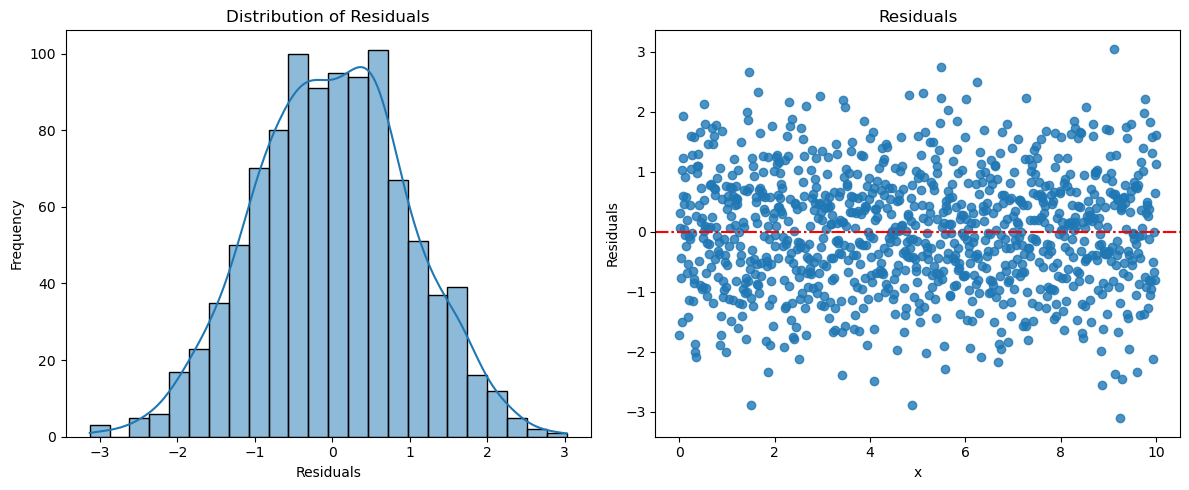

In [4]:
# Generate example data
x = np.linspace(0, 10, 1000)
theta_0 = 1
theta_1 = 2
y = theta_0 + theta_1 * x + np.random.normal(0, 1, 1000)  # Linear model with normal errors

# Calculate residuals
residuals = y - (theta_0 + theta_1 * x)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of residuals
sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Plot of residuals
sns.residplot(x = x, y = residuals)
axs[1].axhline(y=0, color='red', linestyle='-.')
axs[1].set_title('Residuals')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

### Confidence intervals

Confidence intervals are crucial in statistical analysis as they provide a range of values within which we can be confident that the true population parameter lies. In linear regression analysis, confidence intervals are utilized to estimate the precision of the coefficients and predictions derived from the model.

**Residual Standard Error**

In order to construct a confidence interval it is necessary to know the dispersion of the random term $\sigma$. However, in general $\sigma$ is not known, but can be estimated from the data. This estimate of $\sigma$ is what is known as the **Residual Standard Error** or $\text{RSE}$ ($\hat{\sigma}$). $\text{RSE}$ is a fundamental measure in regression analysis and quantifies the dispersion of the observed values around the regression line and since said dispersion is given by $\text{RSS}$, under the assumptions of homoscedasticity (constant variance of errors) and independence of errors (uncorrelated), the unbiased estimate of the variance is obtained by dividing the sum of the squared residuals by $(n - M - 1)$, where $N$ is the number of observations and $M$ is the number of predictors (for the case of simple linear regression, there would be two degrees of freedom):

$$
\text{RSE} := \sqrt{\frac{\text{RSS}}{N - M - 1}} = \hat{\sigma}
$$

**Confidence Interval for Regression Coefficients**

To construct a confidence interval, it is necessary to estimate the population mean $\mu$ of the response variable $Y$. To do this, we must first calculate the sample mean $\bar{y}$:

$$
\hat{\mu} = \bar{y} = \frac{1}{N}\sum _{i=1}^Ny_i
$$

Now, the standard error of the mean $\text{SE}(\hat{\mu})$ is determined by dividing $\sigma^2$ by the sample size $N$, given that:

$$
\text{Var}(\hat{\mu}) = \text{Var}(\bar{y}) = \frac{1}{N^2}\text{Var}(\sum _{i=1} ^N y_i)
$$

Because $y_i = \theta_0 + \theta_1 x_i + \varepsilon_i$ according to the linear model, we observe that $y_i$ are independent, so:

$$
\text{Var}(\bar{y}) = \frac{1}{N^2}\sum _{i=1}^N \text{Var}(y_i) = \frac{1}{N^2 }\sum _{i=1}^N \text{Var}(\varepsilon_i)
$$

Assuming homoscedasticity, we know that $\text{Var}(\varepsilon_i) = \sigma^2 = \text{constant}$, and we obtain:

$$
\text{Var}(\bar{y}) = \frac{1}{N^2}\sum _{i=1}^N\sigma^2 = \frac{1}{N^2}N\sigma ^2 = \frac{\sigma^2}{N} = \text{SE}(\hat{\mu})^2
$$

Based on this, we have the possibility of constructing a confidence interval around the sample mean. Typically, a **95%** confidence level is chosen, resulting in an interval of $\hat{\mu} \pm 2 \times \text{SE}(\hat{\mu})$. Therefore:

$$
[\hat{\mu} - 2 \cdot \text{SE}(\hat{\mu}), \hat{\mu} + 2 \cdot \text{SE}(\hat{\mu})]
$$

For the regression coefficients $\hat{\theta}_0$ and $\hat{\theta}_1$, confidence intervals are calculated to evaluate the uncertainty when estimating these parameters. To do this, the standard errors of both parameters must be calculated, which is what is done in what follows. If we define the quantity:

$$
k_i = \frac{x_i - \bar{x}}{\sum(x_i - \bar{x})^2}
$$
we can rewrite the relationship obtained by least squares for $\hat{\theta}_1$:

$$
\begin{split}
\hat{\theta}_1 &= \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2} \\
& = \sum k_iy_i - \bar{y}\sum k_i \\
& = \sum k_iy_i - \bar{y}\sum k_i - \text{constant}
\end{split}
$$

If we apply properties of the variance we have that:

$$
\begin{split}
\text{Var}(\hat{\theta}_1) & = \text{Var}\left(\sum k_iy_i\right) - \text{Var}(\text{constant}) - 2 \, \text{Cov}\left(\sum k_iy_i,\text{constant}\right)\\
& = \sum k_i^2 \, \text{Var}(y_i) \\
& = \sigma^2\sum k_i \\
& = \sigma^2\sum\frac{(x_i - \bar{x})^2}{\left[\sum(x_i - \bar{x})^2\right]^2} \\
& = \sigma^2 \frac{\sum(x_i - \bar{x})^2}{\left[\sum(x_i - \bar{x})^2\right]^2} \\
& = \frac{\sigma^2 }{\sum (x_i - \bar{x})^2} \\
\end{split}
$$

On the other hand, from the relationship obtained for the parameter $\hat{\theta}_0$, we have that:

$$
\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}
$$

Again, applying variance properties:

$$
\begin{split}
\text{Var}(\hat{\theta}_0) & = \text{Var}(\bar{y}) - \bar{x}^2\text{Var} (\hat{\theta}_1) \\
& = \frac{\sigma^2}{N} - \bar{x}^2\frac{\sigma^2 }{\sum (x_i - \bar{x})^2} \\
& = \sigma^2 \big[ \frac{1}{N} + \frac{\bar{x}^2}{\sum (x_i - \bar{x })^2} \big] \\
\end{split}
$$

Therefore, for $\hat{\theta}_0$, which represents the intercept, its standard error is computed using the variance of the residuals and the spread of the predictor variable $x$. Conversely, $\hat{\theta}_1$, the slope coefficient, has a standard error influenced solely by the spread of the predictor variable. Larger standard errors indicate greater uncertainty in estimating the coefficients. A **95%** confidence interval for each coefficient is constructed by adding and subtracting twice their respective standard errors from the estimated coefficient value. The interpretation of these intervals is that with **95%** confidence, the true value of the coefficient lies within the interval. Additionally, examining the variability of standard errors provides insights into the sensitivity of the coefficients to changes in the data. Specifically, $\text{SE}(\hat{\theta}_1)$ decreases as the spread of $x$ increases, meaning more reliable estimates of the slope when the predictor variable is more dispersed. Furthermore, in situations where the mean of $x$ is zero ($\hat{\theta}_0 = \bar{y}$), the standard error of $\hat{\theta}_0$ equates to the standard error of $\text{SE}(\hat{\mu})$. 

Summarizing:

$$
\left\{
\begin{array}{l}
\text{SE}(\hat{\theta}_0)^2 = \sigma^2 \big[ \frac{1}{N} + \frac{\bar{x}^2}{\sum (x_i - \bar{x })^2} \big] \\
\\
\text{SE}(\hat{\theta}_1)^2 = \frac{\sigma^2}{\sum (x_i - \bar{x})^2}
\end{array} \right.
$$

with **95%** confidence that the parameters are twice the standard error of the respective parameter.

* $\text{SE}(\hat{\theta}_1)$ is smaller when $x_i$ is more spread out because we have more freedom to estimate a slope in this case.
* $\bar{x} = 0 \, \big(\hat{\theta}_0 = \bar{y}\big) \Rightarrow \text{SE}(\hat{\theta}_0) = \text{SE}(\hat{\mu })$

In [5]:
# Mean value of RSS
mean_rss = np.mean(residuals ** 2)
print("Mean value of RSS:", mean_rss)

# Var(RSS)
n = len(residuals)
p = 2  # For simple linear regression
var_rss = np.sum(residuals ** 2) / (n - p - 1)
print("Variance of RSS:", var_rss)

# Estimator of sigma (RSE)
RSE = np.sqrt(var_rss)
print("RSE:", RSE)

Mean value of RSS: 0.966365421419428
Variance of RSS: 0.9692732411428566
RSE: 0.9845167551356638


In [6]:
# Calculations
n = len(residuals)
p = 2  # for simple linear regression
x_bar = np.mean(x)

# Estimator for mu (y_bar)
mu_hat = np.mean(y)
se_mu = np.sqrt(var_rss / n)

# Estimator for theta_0
se_theta_0 = np.sqrt(var_rss * (1/n + x_bar**2 / np.sum((x - x_bar)**2)))

# Estimator for theta_1
se_theta_1 = np.sqrt(var_rss / np.sum((x - x_bar)**2))

# 95% Confidence Intervals
ci_mu = (mu_hat - 2.0 * se_mu, mu_hat + 2.0 * se_mu)
ci_theta_0 = (theta_0 - 2.0 * se_theta_0, theta_0 + 2.0 * se_theta_0)
ci_theta_1 = (theta_1 - 2.0 * se_theta_1, theta_1 + 2.0 * se_theta_1)

print("Estimation of mu = ", mu_hat)
print("Standard error se = ", se_mu)
print("Confidence interval for mu = ", ci_mu)
print('------------------------------')
print("Estimation of theta_0 = ", theta_0)
print("Standard error se_theta_0 = ", se_theta_0)
print("Confidence interval for theta_0 = ", ci_theta_0)
print('------------------------------')
print("Estimation of theta_1 = ", theta_1)
print("Standard error se_theta_1 = ", se_theta_1)
print("Confidence interval for theta_1 = ", ci_theta_1)

Estimation of mu =  10.997224909078557
Standard error se =  0.031133153408269724
Confidence interval for mu =  (10.934958602262018, 11.059491215895097)
------------------------------
Estimation of theta_0 =  1
Standard error se_theta_0 =  0.062219636248970346
Confidence interval for theta_0 =  (0.8755607275020593, 1.1244392724979406)
------------------------------
Estimation of theta_1 =  2
Standard error se_theta_1 =  0.01077406124692324
Confidence interval for theta_1 =  (1.9784518775061535, 2.0215481224938463)


### Student's t-test

The standard error (SE) can be used to perform hypothesis tests to determine whether there is a significant relationship between the predictor variable $X$ and the response variable $Y$.

$$
\left\{
\begin{array}{l}
H_0: \theta_1 = 0 \\
\\
H_1: \theta_1 \neq 0
\end{array} \right.
$$

* If $\theta_1 = 0$, it implies that $Y = \theta_0 + \varepsilon$, and therefore $X$ does not influence $Y$.

To assess the significance of the relationship, we use the t-statistic, given by:

$$
t = \frac{\hat{\theta}_1 - 0}{\text{SE}(\hat{\theta}_1)}
$$

The t-test is utilized here to evaluate whether the slope coefficient $\theta_1$ significantly differs from zero. The rationale behind using the t-test is that it allows us to determine if the estimated coefficient $\hat{\theta}_1$ is statistically different from zero, indicating whether there is a significant linear relationship between the predictor variable $X$ and the response variable $Y$.

We then analyze the **p-value**, which indicates the probability of observing a t-value as extreme as the one computed, given that the null hypothesis is true. In this context:

- If the **p-value** is less than the chosen significance level (usually $\alpha = 0.05$), we reject the null hypothesis $H_0$ in favor of the alternative hypothesis $H_1$, suggesting that there is evidence of a linear relationship between $X$ and $Y$.
- If the **p-value** is greater than or equal to the significance level ($\alpha = 0.05$), we do not have enough evidence to reject the null hypothesis, indicating that there is insufficient evidence to conclude that $X$ influences $Y$.

In [7]:
from scipy.stats import t

# Calculations
n = len(residuals)
p = 2  # For simple linear regression
x_bar = np.mean(x)

# Estimator for theta_1
SE_theta_1 = np.sqrt(var_rss / np.sum((x - x_bar)**2))

# t-test for theta_1
t_stat_theta_1 = theta_1 / SE_theta_1

# Degrees of freedom
degrees_freedom = n - p - 1

# Calculating the p-value using the Student's t-distribution
p_value_theta_1 = 2 * (1 - t.cdf(np.abs(t_stat_theta_1), degrees_freedom))

print("t-statistic for theta_1:", t_stat_theta_1)
print("p-value for theta_1:", p_value_theta_1)

# Checking significance at the 0.05 level
alpha = 0.05
if p_value_theta_1 < alpha:
    print("The variable x has a significant relationship with y.")
else:
    print("The variable x does not have a significant relationship with y.")

t-statistic for theta_1: 185.63102196686899
p-value for theta_1: 0.0
The variable x has a significant relationship with y.


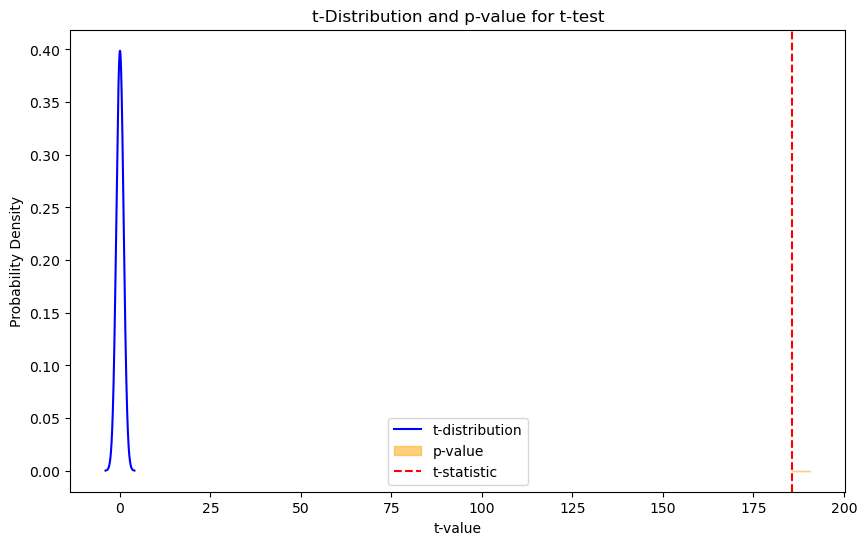

In [8]:
# Plot of the t-statistic with shaded area
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-4, 4, 400)
y_vals = t.pdf(x_vals, degrees_freedom)
plt.plot(x_vals, y_vals, 'b-', label='t-distribution')

# Shaded area for the p-value
x_fill = np.linspace(t_stat_theta_1, t_stat_theta_1 + 5.)
y_fill = t.pdf(x_fill, degrees_freedom)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label='p-value')

# Vertical line at the t-statistic value
plt.axvline(x=t_stat_theta_1, color='r', linestyle='--', label='t-statistic')

plt.title("t-Distribution and p-value for t-test")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### Analysis of Variance (ANOVA) to assessing the linear regression model

**Analysis of Variance (ANOVA)** is a statistical technique used to compare means between two or more groups. It assesses whether there are statistically significant differences among the means of the groups by examining the variability within each group compared to the variability between groups.

In the context of regression analysis, **ANOVA** is often used to evaluate the overall significance of the regression model. It helps to determine whether the explanatory variables collectively have a significant effect on the response variable.

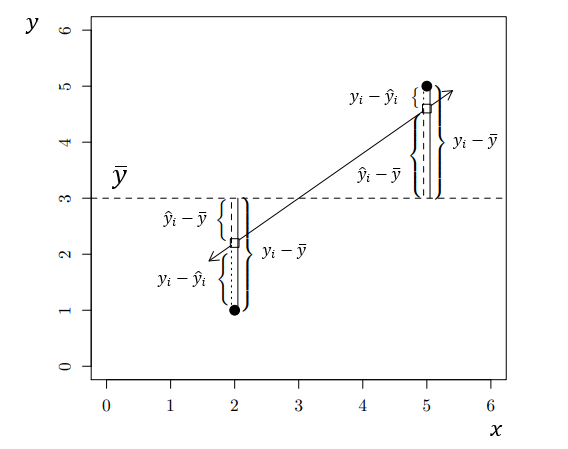

To implement **ANOVA** in the context of simple linear regression we observe from the figure above that we can establish the following relationship :

$$y_i - \bar{y} = \hat{y}_i - \bar{y} + y_i - \hat{y}_i$$

$$ \Rightarrow \sum_{i=1}^N (y_i - \bar{y})^2 = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2$$

To prove the last relationship, we observe that

$$
2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) = 2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) e_i = 2 \sum_{i=1}^N \hat{y}_ie_i - 2 \bar{y}\sum_{i=1}^N e_i
$$

But:

$$
\sum_{i=1}^N e_i = \sum_{i=1}^N \left( y_i - \hat{\theta}_0 - \hat{\theta}_1x_i \right) = \sum_{i=1}^N y_i - N\hat{\theta}_0 - \hat{\theta}_1\sum_{i=1}^N x_i = 0
$$

from the relationship obtained by imposing $\frac{\partial \text{RSS}}{\partial \theta_0} = 0$. In the same way, from the relationship obtained by imposing $\frac{\partial \text{RSS}}{\partial \theta_1} = 0$:

$$
\begin{split}
& \sum_{i=1}^N y_ix_i - \hat{\theta}_0 \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^N x_i^2 = 0 \\
& \sum_{i=1}^N x_i\left( y_i - \hat{\theta}_0 - \hat{\theta}_1 x_i\right) = 0 \\
& \sum_{i=1}^N x_i\left( y_i - \hat{y}_i \right) = 0 \\
& \sum_{i=1}^N x_ie_i = 0 
\end{split}
$$

Therefore:

$$
\sum_{i=1}^N \hat{y}_ie_i = \sum_{i=1}^N \left(\hat{\theta}_0 + \hat{\theta}_1 x_i\right) e_i = \hat{\theta}_0\sum_{i=1}^N e_i + \hat{\theta}_1  \sum_{i=1}^N x_ie_i = 0
$$

And substituting these results we obtain:

$$
2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) = 0
$$

And finally we get

$$
\begin{split}
\sum_{i=1}^N (y_i - \bar{y})^2 & = \sum_{i=1}^N \left[\left(\hat{y}_i - \bar{y}\right) + \left(y_i - \hat{y}_i\right) \right]^2\\
& = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2 + 2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) \\
& = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2
\end{split}
$$

Next, we introduce the following definitions:

- **TSS** is **Total Sum of Squares** represents the total variability in the observations of the dependent variable

$$
\text{TSS} := \sum_{i=1}^n (y_i - \bar{y})^2
$$

- **MSS** is **Model Sum of Squares** represents the variability explained by the regression model

$$
\text{MSS} := \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

- **RSS** is **Residual Sum of Squares** represents the variability not explained by the regression model 

$$
\text{RSS} := \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Therefore

$$
\text{TSS} = \text{MSS} + \text{RSS}
$$

And, when a sum of squares is divided by its associated degrees of freedom, the result is called a mean square:

- **Mean of Total Squares** (**MTS**): $$\frac{\text{TSS}}{1} = \text{MTS}$$ Only one degree of freedom is needed to determine the total variability.

- **Model Mean Squares** (**MMS**): $$\frac{\text{MSS}}{1} = \text{MMS}$$ Only one degree of freedom is needed to determine the variability explained by the model.

- **Mean of Squares of the Residuals** (**MSR**): $$\frac{\text{RSS}}{N-2} = \text{MSR}$$ Two degrees of freedom are needed to determine the variability not explained by the model.

The mean squares are not additive:

$$\text{MTS} \neq \text{MMS} + \text{MSR}$$

Based on this, we can use a Fisher's F-test to assess the significance of the model, as the F-statistic compares the variability explained by the model with the unexplained variability. That is:

$$F = \frac{\text{MMS}}{\text{MSR}}$$

If the model is significant, it is expected that F is greater than 1. Subsequently, the $\mathrm{p-value}$ can be analyzed based on a predetermined significance level (usually $\alpha = 0.05$).

In [9]:
# ANOVA (Analysis of Variance)
# ============================

# Model Sum of Squares (MSS)
mss = np.sum((theta_1 * x + theta_0 - np.mean(y))**2)

# Residual Sum of Squares (RSS)
rss = np.sum(residuals**2)

# Total Sum of Squares (TSS)
tss = mss + rss

# Degrees of Freedom
p = 2  # for simple linear regression
df_model = 1  # Number of regression coefficients (theta_0 and theta_1)
df_residual = n - p - 1
df_total = 1

# Model Mean Square (MMS)
mms = mss / df_model

# Mean Square of Residuals (MSR)
msr = rss / df_residual

# F-value
f_value = mms / msr

# Print ANOVA results and R-squared
print("Model Sum of Squares (MSS):", mss)
print("Residual Sum of Squares (RSS):", rss)
print("Total Sum of Squares (TSS):", tss)
print("Model Mean Square (MMS):", mms)
print("Mean Square of Residuals (MSR):", msr)
print("F-value:", f_value)

Model Sum of Squares (MSS): 33400.07443452969
Residual Sum of Squares (RSS): 966.365421419428
Total Sum of Squares (TSS): 34366.43985594912
Model Mean Square (MMS): 33400.07443452969
Mean Square of Residuals (MSR): 0.9692732411428566
F-value: 34458.88426172596


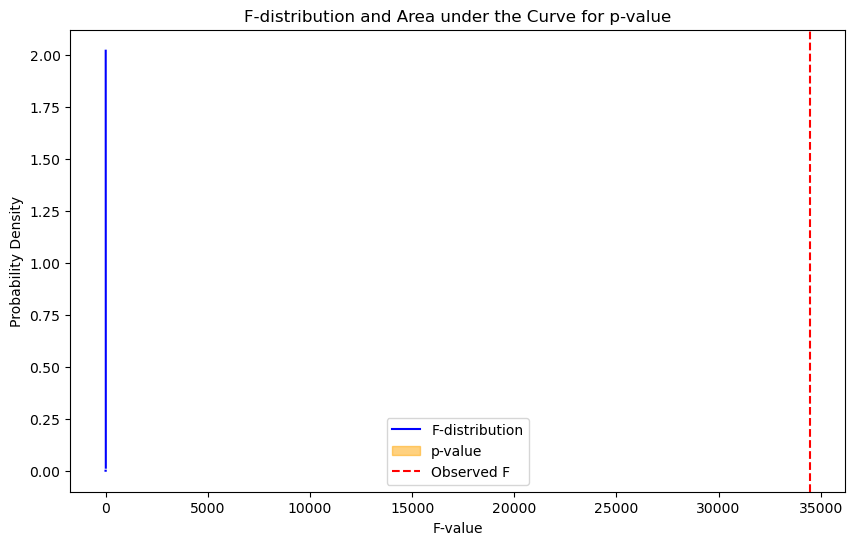

Observed F-value: 34458.88426172596
Observed p-value: 1.1102230246251565e-16


In [10]:
from scipy.stats import f

# Degrees of freedom for the numerator and denominator
df_num = df_model
df_den = df_residual

# Values for the x-axis
x_vals = np.linspace(-10, 5, 400)

# Probability density function of the F-distribution
y_vals = f.pdf(x_vals, df_num, df_den)

# Observed F-value
f_observed = f_value

# Observed p-value
p_value_observed = 1 - f.cdf(f_observed, df_num, df_den)

# Create the figure and axes
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='F-distribution')

# Shaded area for the p-value
x_fill = np.linspace(f_observed, f_observed + 20.)
y_fill = f.pdf(x_fill, df_num, df_den)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label='p-value')

# Vertical line at the observed F-value
plt.axvline(x=f_observed, color='r', linestyle='--', label='Observed F')

plt.title("F-distribution and Area under the Curve for p-value")
plt.xlabel("F-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

print("Observed F-value:", f_observed)
print("Observed p-value:", p_value_observed)

### $R^2$ Statistic

Another measure used in regression to evaluate how much variability in the dependent variable ($Y$) is explained by the regression model compared to the total variability present in the data is the coefficient of determination $R^2$. In essence, $R^2$ provides a measure of the goodness of fit of the model to the observed data.

$$R^2 = \frac{MSS}{TSS} = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

- If $R^2 = 1$: It means that the model explains all the variability in the observed data. Each point falls exactly on the regression line. This is very rare in practice and could indicate overfitting of the model.

- If $R^2 = 0$: Indicates that the model is not explaining any variability in the observed data.

- If $0 < R^2 < 1$ Indicates the proportion of total variability that is explained by the model.

In a simple linear regression

$$R^2 = r^2$$

where $r$ is the Pearson correlation coefficient.

In [11]:
# Analysis of Coefficient of Determination (R-squared)
# ====================================================

# Calculate R-squared manually
y_mean = np.mean(y)
tss = np.sum((y - y_mean)**2)
r_squared = mss / tss

print("Coefficient of determination (R-squared) calculated manually:", r_squared)

Coefficient of determination (R-squared) calculated manually: 0.9761600453872855


## `Python` Implementation (using libraries)

`Python` provides a collection of libraries that streamline the implementation of linear regression, making the code more concise and straightforward.

In [12]:
# Importing ML libraries
import statsmodels.api as sm
import scipy.stats as stats

In [13]:
# Data generation
N = 1000
theta_1 = np.random.normal(loc=2, scale=1, size=N)
theta_0 = np.random.randn(1)
x = np.random.randn(N)
y = theta_1 * x + theta_0 + np.random.randn(N)

# Create a design matrix with a column of ones for the constant term
X = sm.add_constant(x)

# Create the linear model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

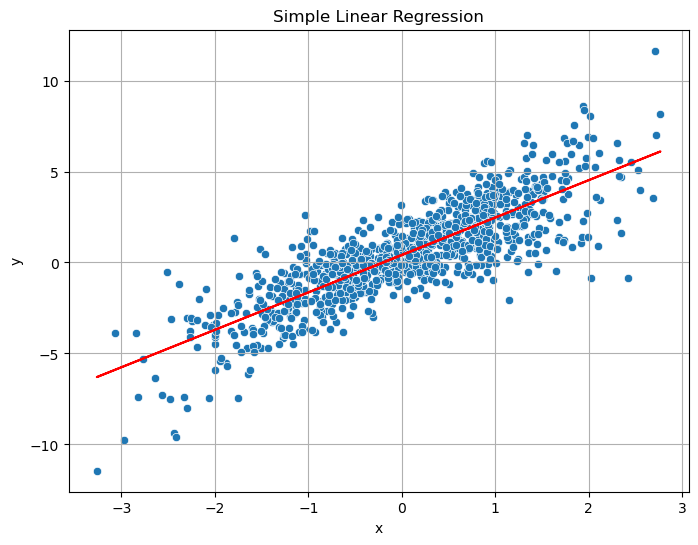

In [14]:
# Estimated coefficients
theta_0 = model.params[0]
theta_1 = model.params[1]
y_pred = x * theta_1 + theta_0

# Plot
plt.figure(figsize=(8, 6))
plt.title("Simple Linear Regression")
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

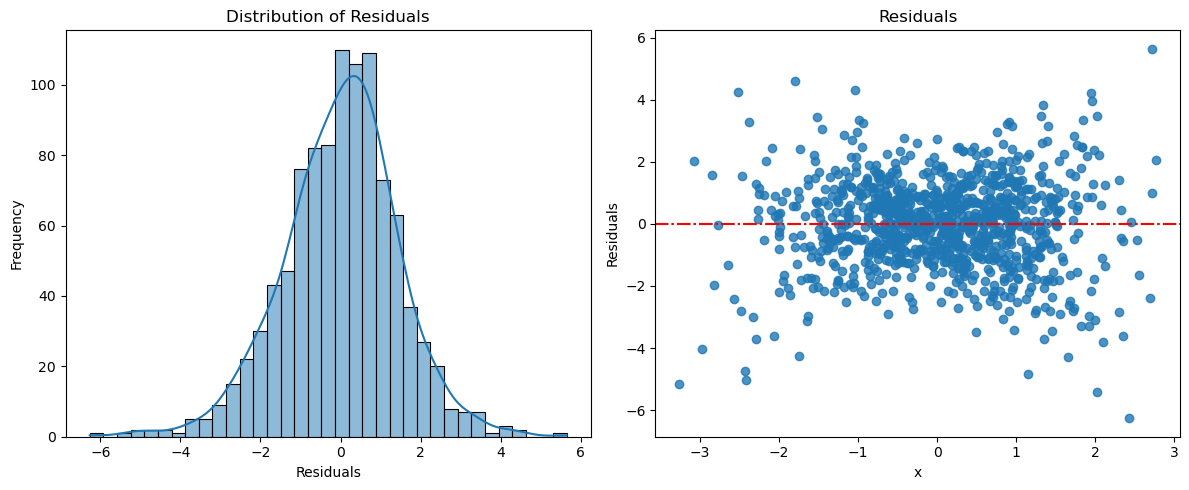

In [15]:
# Calculate residuals
residuals = y - y_pred

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of residuals
sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Plot of residuals
sns.residplot(x = x, y = residuals)
axs[1].axhline(y=0, color='red', linestyle='-.')
axs[1].set_title('Residuals')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [16]:
# Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2255.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):          2.48e-258
Time:                        13:01:27   Log-Likelihood:                -1781.8
No. Observations:                1000   AIC:                             3568.
Df Residuals:                     998   BIC:                             3577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4121      0.046      9.050      0.0

## Assessing and Selecting the Best Model

### Machine Learning Modelling

A model is an abstract and simplified representation of reality, meaning that there is usually no single statistical model that can fully explain a phenomenon. Therefore, models can be refined or replaced by others that better fit the statistical data. In this context, **Machine Learning** (**ML**) offers a wide range of models that allow the explanation of phenomena of different natures.

Machine Learning encompasses a set of methods designed to fulfill two fundamental objectives:

1. **Inference**
2. **Prediction**

Regarding the first objective, a key challenge in statistics is the inherent limitation of not having complete information, generally facing only a fraction of it. The concept of **inference** includes a set of methods and procedures that, through induction, allow us to deduce properties of a statistical population from a subset of it. This process can be represented as follows:

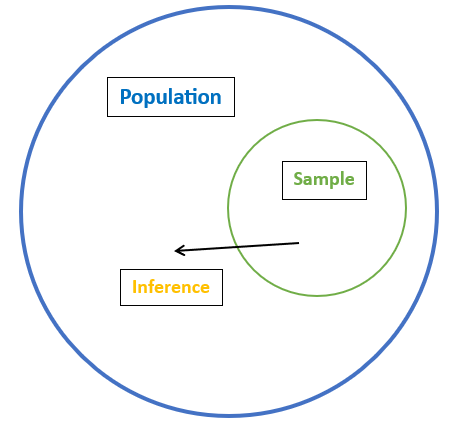

- **Population** refers to the set of elements or events considered to answer a question or conduct an experiment.
- **Sample** is a representative portion of the population.
- **Induction** involves drawing conclusions from the analysis of specific cases to generalize broader principles.

To explain what we mean by prediction, let's consider a scenario where we have $M$ predictors, denoted as $X_1, X_2, \dots, X_M$, or more compactly represented as:

$$
X := (X_1, X_2, \dots, X_M)
$$

Additionally, suppose $Y$ is a quantitative response, and there exists a relationship between $Y$ and $X$. Without loss of generality, we can express this relationship as:

$$
Y = f(X) + \varepsilon
$$

where:

- $f$ represents some fixed but unknown function of the predictors.
- $\varepsilon$ denotes the random error term that satisfies:
    - $\varepsilon \neq \varepsilon(X)$ (i.e., $\varepsilon$ is independent of $X$)
    - $\bar{\varepsilon} = 0$

Therefore, we can predict the response value $Y$ by estimating $f(X)$, that is:

$$
\hat{Y} = \hat{f}(X)
$$

where:

- $\hat{f}$ is the estimate of $f$.
- $\hat{Y}$ is the resulting prediction of $Y$.

For a moment let's assume that both $\hat{f}$ and $X$ are fixed, so the only variability comes from $\varepsilon$. We can quantify the accuracy of our model in predicting $\hat{Y}$ by examining:

$$
\begin{split}
\mathbb{E}[Y - \hat{Y}]^2 & = \mathbb{E}[f(X) + \varepsilon - \hat{f}(X)]^2 \\
& = \mathbb{E}[f(X) - \hat{f}(X)]^2 + 2\mathbb{E}\{ [f(X) - \hat{f}(X)]\varepsilon \} + \mathbb{E}(\varepsilon^2) \\
& = [f(X) - \hat{f}(X)]^2 + 2[f(X) - \hat{f}(X)] \mathbb{E}(\varepsilon) + \mathrm{Var}(\varepsilon) + \mathbb{E}^2(\varepsilon)
\end{split}
$$

Since $\mathbb{E}(\varepsilon) = 0$ and $\mathbb{E}^2(\varepsilon) = 0$:

$$
\begin{split}
\mathbb{E}[Y - \hat{Y}]^2 & = [f(X) - \hat{f}(X)]^2 + \mathrm{Var}(\varepsilon) \\
& \rightarrow \boxed{\mathrm{Error} = \mathrm{Reducible} + \mathrm{Irreducible}}
\end{split}
$$

Here are some key observations:

- The term $[f(X) - \hat{f}(X)]^2$ is reducible because we can improve the estimate $\hat{f}$ by implementing a more appropriate **ML** technique. On the other hand, the term $\mathrm{Var}(\varepsilon)$ is irreducible because $Y = Y(\varepsilon)$ and $\varepsilon \neq \varepsilon(X)$. No matter how good the estimate $\hat{f}$ is, the term $\varepsilon$ does not approach zero.

- It may happen that $\varepsilon = \varepsilon(X')$, where $X'$ corresponds to other predictors useful for predicting $Y$ but not measured. Therefore, $X'$ would not be included in $f$ for predicting $Y$.

- $\varepsilon$ can encompass immeasurable variations. For example, in the case of an adverse reaction to a drug in a specific patient on a given day, it varies according to the drug's manufacturing and the patient's overall well-being on that day.

There are two distinct methodologies for estimating $f$, classified as either parametric or non-parametric:

1. **Parametric Methods**:
   1. **Procedure**:
        - $f := f(\theta_0, \theta_1, \dots)$
        - $\mathrm{TD} = \{(x_{ij}, y_i); i=1, 2, \dots, N; j=1, 2, \dots, M\} \overset{\text{LS, ML, ...}}{\longrightarrow}\hat{\theta}_0, \hat{\theta}_1, \dots$        
   2. **Advantages and Disadvantages**:
        - **Underfitting and Overfitting**: Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It fails to learn the relationships between the input features and the target variable, resulting in poor performance on both training and unseen data. In other words, the model lacks the necessary complexity to represent the true underlying structure of the data. Conversely, overfitting occurs when a model is excessively complex and fits too closely to the training data, capturing not only the underlying patterns but also the noise or random fluctuations present in the data. This overfitting leads to poor generalization to new, unseen data, as the model essentially memorizes the specific instances in the training data rather than learning broader relationships and trends.
        - **Inflexible and "cheap"**: These models are rigid but computationally inexpensive (generally, $M$ is small).
        - **Easy interpretation**: The relationship between $X$ and $Y$ is straightforward to interpret.

2. **Non-Parametric Methods**:
    1. **Procedure**: Instead of assuming a functional form for $f$ a priori, the goal is to find the estimate $\hat{f}$ that best fits the training data.
    2. **Advantages and Disadvantages**:
        - **Flexible and "expensive"**: These models are flexible but computationally demanding, often involving a large value of $N$.
        - **Difficult interpretation**: Interpreting the relationship between $X$ and $Y$ is significantly challenging.

In summary, **Machine Learning** relies on principles from Statistics (**S**), Numerical Analysis (**NA**), and Computer Science (**CS**):

$$
\boxed{\mathbf{ML} \equiv \mathbf{S} + \mathbf{NA} + \mathbf{CS}}
$$

The primary objective of **ML** is to estimate the function $f$ to better understand the relationship between $Y$ and $X$ (inference) and to predict the response value $Y$ given the predictors $X$ (prediction).

### Classification of Machine Learning Algorithms

In addition to prediction algorithms, there are other types of algorithms in machine learning. The standard classification is into supervised and unsupervised algorithms.

**Supervised Learning**:
- **Description**: In supervised learning, the training data consists of observations $x_{ij}$, $i=1,2,\dots, N$, $j=1,2,\dots, M$ associated with a response $y_i$. The objective is to design a model that relates the response to the predictors, aiming to accurately predict the response for future observations (prediction) or to better understand the relationship between the response and the predictors (inference).
- **Examples of Applications**:
    - Classification: Predicting the category to which a new instance belongs (e.g., **Decision Trees**, **Support Vector Machines**, **Neural Networks**, ...).
    - Regression: Predicting a continuous numerical value (e.g., **Linear Regression**, ...).

**Unsupervised Learning**:
- **Description**: In unsupervised learning, the training data consists of observations $x_{ij}$, $i=1,2,\dots, N$, $j=1,2,\dots, M$ that are not labeled with a response. The goal is to find patterns and understand the relationships and properties among the observations. These algorithms work well for tasks such as clustering and dimensionality reduction.
- **Examples of Applications**:
    - Clustering: Grouping similar data points together (e.g., **K-Means**, **Hierarchical Clustering**, ...).
    - Dimensionality Reduction: Reducing the number of variables in the data while preserving relevant information (e.g., **Principal Component Analysis (PCA)**, ...).

### Bias–variance tradeoff

In **Probability**, the parameters given by a model are known in advance, and from them, the probabilities of the outcomes are determined. In other words, given the model parameters, one can construct the distributions. In **Statistics**, the situation is the opposite: the distributions of the data are known, and the goal is to estimate the model parameters. Schematically, this can be represented as follows:

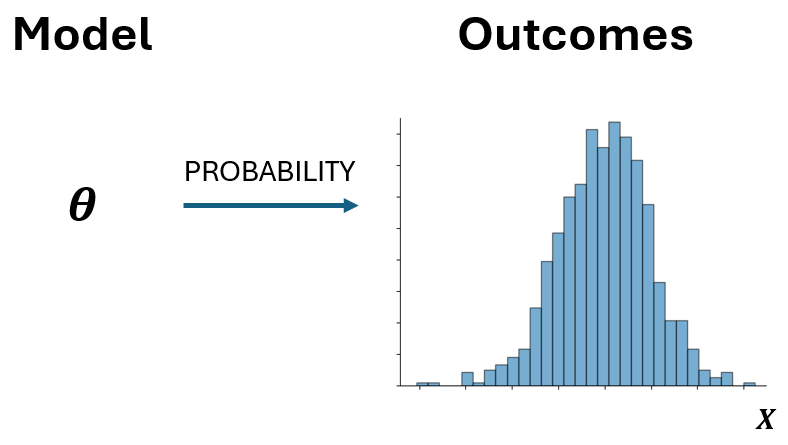

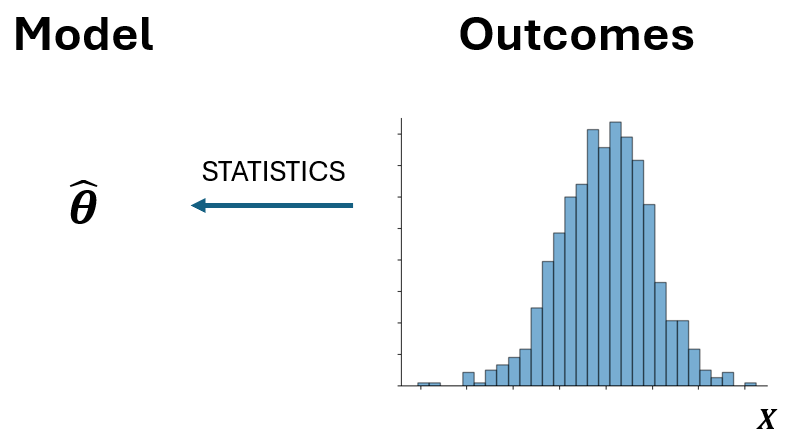

**ML** involves estimating the model parameters ($\hat{\theta}$) that best fit the training dataset. This typically requires a numerical optimization procedure aimed at minimizing an objective function, which varies depending on the model type. This objective function, also known as cost or loss function, could be the sum of squared residuals in linear regression, the likelihood function in logistic regression, cross-entropy in binary classification, or mean squared error in neural networks.

It's important to note that the estimated parameters ($\hat{\theta}$) would generally differ if the model were fitted to a different training dataset than the one used for initial estimation. Thus, model parameters exhibit variability due to different fits to diverse training datasets. In ML models, errors typically arise from two sources: bias and variance. Bias stems from incorrect assumptions in the learning algorithm, potentially leading to underfitting by failing to capture crucial feature-target relationships. Conversely, variance reflects the model's sensitivity to fluctuations in the training data, potentially causing overfitting by fitting to noise rather than underlying patterns. 

Increasing the number of parameters in a model enhances its flexibility and reduces bias, as it fits more closely to the training data. However, heightened model complexity also amplifies variance, making it more responsive to training set particulars and less adept at generalizing to new data.

To comprehend how bias and variance contribute to a model's total error, we introduce the **bias-variance trade-off**. This concept assesses the expected generalization error of a learning algorithm on a specific problem, breaking it down into three components: bias, variance, and an irreducible error term due to inherent data noise.

The bias-variance decomposition can be derived by calculating the expected prediction error ("prediction risk") of a regression fit $\hat{f}(X)$ at a test point, i.e., an unseen point, say $X = x_{test}$ (test error), using squared error loss:


$$
\begin{split}
\text{Error}(x_{test}) & = \mathbb{E}[ \{Y - \hat{f}(X)\}^2 | X = x_{test}] \\
                       & = \mathbb{E}[Y^2 - 2Y\hat{f}(x_{test}) + \hat{f}^2(x_{test})] \\
                       & = \mathbb{E}[Y^2] - 2\mathbb{E}[Y\hat{f}(x_{test})] + \mathbb{E}[\hat{f}^2(x_{test})]
\end{split}
$$

Given that $Y = f(X) + \varepsilon$ and $\mathbb{E}[\varepsilon]$:

$$
\begin{split}
\mathbb{E}[Y^2] & = \mathbb{E}[(f(x_{test}) + \varepsilon)^2] \\
                & = \mathbb{E}[f^2(x_{test})] + 2\mathbb{E}[f(x_{test})\varepsilon] + \mathbb{E}[\varepsilon^2] \\
                & = f^2(x_{test}) + 2f(x_{test})\mathbb{E}[\varepsilon] + \mathbb{E}[\varepsilon^2] \\
                & = f^2(x_{test}) + \sigma^2 \\
\end{split}
$$

On the other hand, because $\hat{f}(x_{test})$ and $\varepsilon$ are independent, it follows that:

$$
\begin{split}
\mathbb{E}[Y\hat{f}] & = \mathbb{E}[(f(x_{test}) + \varepsilon)\hat{f}(x_{test})] \\
                     & = \mathbb{E}[f(x_{test})\hat{f}(x_{test})] + \mathbb{E}[\varepsilon\hat{f}(x_{test})] \\
                     & = f(x_{test})\mathbb{E}[\hat{f}(x_{test})] + \mathbb{E}[\varepsilon]\mathbb{E}[\hat{f}(x_{test})] \\
                     & = f(x_{test})\mathbb{E}[\hat{f}(x_{test})]
\end{split}
$$

Finally, inserting the last two relations into the expression of the expected value of the squared difference we obtain:

$$
\begin{split}
\text{Error}(x_{test}) & = f^2(x_{test}) + \sigma^2 - 2f(x_{test})\mathbb{E}[\hat{f}(x_{test})] + 
                         \mathbb{E}[\hat{f}^2(x_{test})] \\
                     & = f^2(x_{test}) + \sigma^2 - 2f(x_{test})\mathbb{E}[\hat{f}(x_{test})] + 
                         \mathbb{E}[\hat{f}^2(x_{test})] + \mathbb{E}[\hat{f}(x_{test})]^2 - 
                         \mathbb{E}[\hat{f}(x_{test})]^2 \\
                     & = \sigma^2 + \left(f(x_{test}) - \mathbb{E}[\hat{f}(x_{test})]\right)^2 + 
                         \text{Var}[\hat{f}(x_{test})] \\
                     & = \sigma^2 + \text{Bias}[\hat{f}(x_{test})]^2 + \text{Var}[\hat{f}(x_{test})] \\
                     & = \text{Error Irreducible} + \text{Bias}^2 + \text{Variance}
\end{split}
$$

The first term is the variance of the random term around its true mean $f(x_{test})$, and it cannot be avoided no matter how good our estimation of $f(x_{test})$ is, which is why it is called irreducible error. Given that all three terms are negative, irreducible error constitutes a lower limit on the anticipated error in new samples.

**Bias-Variance Trade-Off for a linear regression**

Let's analyze the bias-variance trade-off for the case of a simple linear regression, since it can be done analytically. To do this, if we consider a set of $N$ training data and construct the matrix $X$ given by:

$$
X = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

we have to:

$$
X^T X =
\begin{bmatrix}
N & \sum_{i=1}^N x_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

On the other hand, from a calculation carried out above, we can derive the following relationship:

$$
\begin{split}
\text{det}(X^T X) & = N\sum_{i=1}^Nx_i^2 - \left( \sum_{i=1}^Nx_i \right)^2 \\
                  & = N \sum_{i=1}^N \left(x_i - \overline{x} \right)^2 \\
                  & = N^2 \text{Var} (x)\\
\end{split}
$$

Remembering in turn that the inverse of a matrix
$
M =
\begin{bmatrix}
M_{11} & M_{12} \\
M_{21} & M_{22}
\end{bmatrix}
$
is
$
M^{-1} = \frac{1}{\text{det}M}
\begin{bmatrix}
M_{22} & -M_{12} \\
-M_{21} & M_{11}
\end{bmatrix}
$
where $\text{det}M = M_{11}M_{22} -  M_{12}M_{21}$ it follows that:

$$
(X^T X)^{-1} = 
\frac{1}{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2}
\begin{bmatrix}
\sum_{i=1}^N x_i^2 & -\sum_{i=1}^N x_i \\
-\sum_{i=1}^N x_i & N
\end{bmatrix}
$$

Besides,

$$
X^TY =
\begin{bmatrix}
\sum_{i=1}^Ny_i \\
\sum_{i=1}^Nx_iy_i
\end{bmatrix}
$$

Therefore, looking closely the product:

$$
\begin{split}
(X^T X)^{-1}X^TY & = \frac{1}{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2}
                     \begin{bmatrix}
                     \sum_{i=1}^N x_i^2 & -\sum_{i=1}^N x_i \\
                     -\sum_{i=1}^N x_i & N
                     \end{bmatrix}
                     \begin{bmatrix}
                     \sum_{i=1}^Ny_i \\
                     \sum_{i=1}^Nx_iy_i
                     \end{bmatrix} \\
                 & = \frac{1}{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2}
                     \begin{bmatrix}
                     \sum_{i=1}^N x_i^2\sum_{i=1}^Ny_i - \sum_{i=1}^N x_i\sum_{i=1}^Nx_iy_i \\
                     -\sum_{i=1}^N x_i\sum_{i=1}^Ny_i + N\sum_{i=1}^Nx_iy_i
                     \end{bmatrix}
\end{split}
$$

If we take into account a calculation made above, we can see that the second element is equal to:

$$
\frac{N\sum_{i=1}^Nx_iy_i -\sum_{i=1}^N x_i\sum_{i=1}^Ny_i}{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} = \frac{\sum_{i=1}^Nx_iy_i - \frac{1}{N}\sum_{i=1}^N x_i\sum_{i=1}^Ny_i}{\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)} = \hat{\theta}_1
$$

On the other hand, the first element is:

$$
\begin{split}
\frac{\sum_{i=1}^N x_i^2\sum_{i=1}^Ny_i - \sum_{i=1}^N x_i\sum_{i=1}^Nx_iy_i}
{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} 
& = 
\frac{\sum_{i=1}^N x_i^2\sum_{i=1}^Ny_i - 
\frac{\left( \sum_{i=1}^N x_i \right)^2\sum_{i=1}^N y_i}{N} + 
\frac{\left( \sum_{i=1}^N x_i \right)^2\sum_{i=1}^N y_i}{N} - 
\sum_{i=1}^N x_i\sum_{i=1}^Nx_iy_i}
{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} \\
& = 
\frac{\sum_{i=1}^Ny_i\left[ \sum_{i=1}^N x_i^2 - \frac{\left( \sum_{i=1}^N x_i \right)^2}{N} \right] -
\left[ \left( \sum_{i=1}^Nx_iy_i - \overline{y}\sum_{i=1}^Nx_i \right) \sum_{i=1}^Nx_i \right]}
{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} \\
& = 
\frac{\sum_{i=1}^Ny_i\left[ \sum_{i=1}^N \left(x_i - \overline{x} \right)^2 \right] -
\left[ \sum_{i=1}^N \left( x_i - \overline{x}\right)\left(y_i - \overline{y} \right)\sum_{i=1}^N x_i \right]}
{N\sum_{i=1}^N \left(x_i - \overline{x} \right)^2} \\
& = 
\overline{y} - \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}\overline{x} \\
& = 
\overline{y} - \hat{\theta}_1\overline{x} \\
& =
\hat{\theta}_0
\end{split}
$$

So, we can define the parameter vector as:

$$
\begin{split}
\boldsymbol{\hat{\theta}} = (X^T X)^{-1}X^TY
                          = \begin{bmatrix}
                            \overline{y} - \hat{\theta}_1\overline{x} \\
                            \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}
                            \end{bmatrix}
                          = \begin{bmatrix}
                            \hat{\theta}_0 \\
                            \hat{\theta}_1
                             \end{bmatrix}
\end{split}
$$

Therefore, we could compactly write the estimate $\hat{f}$ for the never seen before test data $\boldsymbol{x}_{*}^T = \left[1 \, \, x_{* }\right]$ as:

$$
\hat{f}(\boldsymbol{x}_{*}) = \boldsymbol{x}_{*}^T\boldsymbol{\hat{\theta}}
$$

Now, assuming that the true relationship is linear, that is, $f(\boldsymbol{x}_{*}) = \boldsymbol{x}_{*}^T\boldsymbol{\theta}$, the bias will be given by:

$$
\begin{split}
\text{bias} & = f(\boldsymbol{x}_{*}) - \mathbb{E}\left[\hat{f}(\boldsymbol{x}_{*}) \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} - 
                \mathbb{E}\left[\boldsymbol{x}_{*}^T\boldsymbol{\hat{\theta}} \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} -
                \mathbb{E}\left[ \boldsymbol{x}_{*}^T(X^T X)^{-1}X^TY \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} -
                \mathbb{E}\left[ \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T
                \left( X\boldsymbol{\theta} + \varepsilon \right) \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} -
                \mathbb{E}\left[ \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T X\boldsymbol{\theta} + 
                \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T \varepsilon \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} -
                \mathbb{E}\left[ \boldsymbol{x}_{*}^TX^{-1}(X^T)^{-1}X^T X\boldsymbol{\theta} + 
                \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T \varepsilon \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} -
                \mathbb{E}\left[ \boldsymbol{x}_{*}^T\boldsymbol{\theta} + 
                \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T \varepsilon \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} - \boldsymbol{x}_{*}^T\boldsymbol{\theta} + 
                \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T \mathbb{E}\left[ \varepsilon \right] \\
            & = \boldsymbol{x}_{*}^T\boldsymbol{\theta} - \boldsymbol{x}_{*}^T\boldsymbol{\theta} \\
            & = 0 \\
\end{split}
$$

So, the estimated parameter vector $\boldsymbol{\hat{\theta}}$ is unbiased, which means that the ordinary least squares method is an unbiased estimator. On the other hand, the variance term will be given by:

$$
\begin{split}
\text{Var}[\hat{f}(\boldsymbol{x}_{*})] & = \mathbb{E}\left[ \left( f(\boldsymbol{x}_{*}) - 
                                            \mathbb{E}\left[\hat{f}(\boldsymbol{x}_{*}) 
                                            \right] \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left( \boldsymbol{x}_{*}^T\boldsymbol{\hat{\theta}} -
                                            \boldsymbol{x}_{*}^T\boldsymbol{\theta}
                                            \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left( \boldsymbol{x}_{*}^T(X^T X)^{-1}X^TY -
                                            \boldsymbol{x}_{*}^T\boldsymbol{\theta}
                                            \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left( \boldsymbol{x}_{*}^T(X^T X)^{-1}X^T\left( X\theta + \varepsilon \right) -
                                            \boldsymbol{x}_{*}^T\boldsymbol{\theta}
                                            \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left( \boldsymbol{x}_{*}^T\theta + 
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \varepsilon -
                                            \boldsymbol{x}_{*}^T\boldsymbol{\theta}
                                            \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \varepsilon
                                            \right)^2 \right] \\
                                        & = \mathbb{E}\left[ 
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \varepsilon
                                            \right) 
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \varepsilon
                                            \right)^T
                                            \right] \\
                                        & = \mathbb{E}\left[ 
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \varepsilon \varepsilon^T
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T
                                            \right)^T
                                            \right] \\
                                        & = \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T 
                                            \mathbb{E}\left[ \varepsilon \varepsilon^T \right]
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T
                                            \right)^T \\
                                        & = \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T \sigma^2\mathbb{1}
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^T
                                            \right)^T \\
                                        & = \sigma^2
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}X^TX
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}
                                            \right)^T \\
                                        & = \sigma^2
                                            \boldsymbol{x}_{*}^T
                                            \left(
                                            \boldsymbol{x}_{*}^T (X^T X)^{-1}
                                            \right)^T \\
                                        & = \sigma^2
                                            \boldsymbol{x}_{*}^T
                                            (X^T X)^{-1}
                                            \boldsymbol{x}_{*} \\
\end{split}
$$

Likewise:

$$
\left[1 \, \, x_{*}\right]
\frac{1}{N^2 \text{Var}(x)}
\begin{bmatrix}
\sum_{i=1}^N x_i^2 & -\sum_{i=1}^N x_i \\
-\sum_{i=1}^N x_i & N
\end{bmatrix}
\begin{bmatrix}
1 \\
x_{*}
\end{bmatrix}
= 
\frac{\sum_{i=1}^N \left( x_i^2 - 2x_{*}x_i + x_{*}^2\right)}
{N^2 \text{Var}(x)}
= 
\frac{\sum_{i=1}^N \left( x_i - x_{*}\right)^2}
{N^2 \text{Var}(x)}
$$

Although the variance $\text{Var}[\hat{f}(\boldsymbol{x}_{*})]$ changes with $x_{*}$, its average (with $x_{*}$ considered as each of the sample values $x_j$) is $\frac{2}{N}\sigma^2$:

$$
\frac{1}{N}\sum_{j=1}^N
\frac{\sum_{i=1}^N \left( x_i - x_{*}\right)^2}
{N^2 \text{Var}(x)}
=
\frac{2}{N}\frac{\sum_{i,j=1}^N \left( x_i - x_{*}\right)^2}
{2N^2 \text{Var}(x)}
$$

$$
\begin{split}
\text{Var}(x) & = \frac{1}{N}\sum_{i=1}^N \left( x_i - \overline{x} \right)^2 \\
              & = \frac{1}{N}\sum_{i=1}^N \left( x_i^2 - 2x_i\overline{x} + \overline{x}^2 \right) \\
              & = \left( \frac{1}{N} \sum_{i=1}^Nx_i^2 \right) -
                  2\overline{x}\left( \frac{1}{N} \sum_{i=1}^Nx_i \right) +
                  \overline{x}^2 \\
              & = \mathbb{E}\left[ x_i^2 \right] - \overline{x}^2
\end{split}
$$

$$
\begin{split}
\frac{1}{2N^2}\sum_{i,j=1}^N \left( x_i - x_j\right)^2 
& =
\frac{1}{2N^2}\sum_{i,j=1}^N \left( x_i^2 - 2x_ix_j + x_j^2\right) \\
& =
\frac{1}{2N}\sum_{j=1}^N \left( \frac{1}{N} \sum_{i=1}^Nx_i^2 \right) -
\left( \frac{1}{N} \sum_{i=1}^Nx_i \right)\left( \frac{1}{N} \sum_{j=1}^Nx_j \right) +
\frac{1}{2N}\sum_{i=1}^N \left( \frac{1}{N} \sum_{j=1}^Nx_j^2 \right) \\
& = 
\frac{1}{2}\left[ \text{Var}(x) + \overline{x} \right] -
\overline{x}^2 +
\frac{1}{2}\left[ \text{Var}(x) + \overline{x} \right] \\
& =
\text{Var}(x)
\end{split}
$$

Thus, the mean square error $\text{MSE}$ is given by:

$$
\text{MSE} := \frac{1}{N}\sum_{j=1}^N\text{Error}(x_{j}) = \sigma^2 + \frac{2}{N}\sigma^2
$$

Although this case corresponds to two predictors, this result can be generalized to the case of a multiple linear regression with $M$ predictors, where:

$$
\text{MSE} := \frac{1}{N}\sum_{i=1}^N\text{Error}(x_{i}) = \sigma^2 + \frac{M}{N}\sigma^2
$$

Which indicates that the variance increases directly with the complexity of the model (given by the number of predictors $M$). Typically, the more complex the $\hat{f}(x_{test})$ model, the more data points it will capture and the less bias it will have. However, complexity will cause the model to present more variability to capture the data points and, therefore, its variance will be greater and this is precisely what we have just seen analytically for the case of a linear regression. We can schematically represent this as follows:

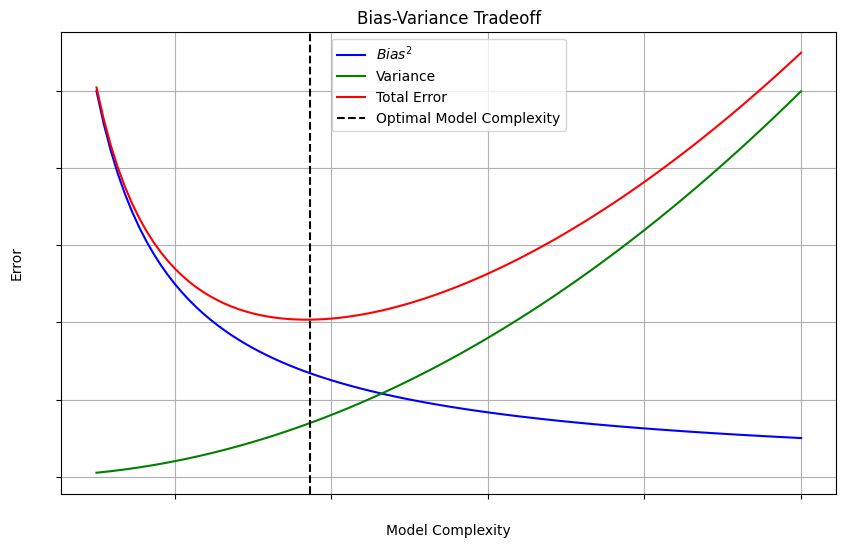

The bias-variance dilemma lies in how to balance both reducible error components to improve their ability to generalize to data never seen before. This is where **resampling methods** come into play, which are indispensable tools in modern statistics. These methods involve iteratively drawing samples from a training set, fitting the model of interest to each of these samples, and estimating the extent to which the fits differ. The most commonly used resampling approaches, which we will implement in this project, are **cross-validation** and **bootstrap**.

**Cross validation** is used to estimate the test error associated with a given model to perform two fundamental procedures in ML: **model evaluation** and **model selection**. **Selection** is the process of measuring the performance of different models to choose the best one, while **evaluation** is the stage where, once the best model is selected, its performance is measured by estimating its prediction error on new ones data. On the other hand, the **bootstrap** is commonly used to provide a measure of the precision of parameter estimates.

### Cross-Validation

Employing a machine learning algorithm on a dataset is worthwhile if it results in a low prediction error. The test error, or prediction error, is the average error that emerges when applying a machine learning method to predict outcomes for new observations not included in the training data. This test error can be readily calculated if there is a large, designated test set available, although this situation is rare. The training error, derived from applying the algorithm to the training data, typically differs and often underestimates the test error. Without a designated test set, various methods can estimate the prediction error from the training data, such as cross-validation, which sets aside part of the training data to apply the method and assess its performance.

A simple way to estimate the test error for a particular machine learning method applied to a dataset is the validation set approach. This involves splitting the dataset randomly into two parts: a training set and a validation set. The model is trained on the training set and then used to predict responses in the validation set. The error rate of the validation set (often measured by MSE) gives an estimate of the test error.

However, there are two main issues with the validation set approach:

1. The test error estimate can be quite variable, depending on the specific observations included in the training and validation sets.

2. Since only a portion of the data is used to train the model, the validation set error rate may overestimate the test error for the model trained on the entire dataset.

These issues can be mitigated using cross-validation, which is widely recognized as the simplest and most commonly used technique for estimating prediction errors. Cross-validation directly estimates the expected error on unseen data, namely, the average error when the model is applied to an independent test set. It's important to note that while cross-validation aims to estimate error with a fixed training set, it primarily provides a reliable estimate of the expected prediction error.

There are different types of cross-validation of which the best known are **k-Fold Cross-Validation** and **Leave-One-Out Cross-Validation (LOOCV)**.

**k-Fold Cross-Validation**

In $k$-Fold cross-validation, the data is randomly divided into $k$ segments or folds of similar size. In each iteration, one of these folds is reserved for validation, while the remaining $k-1$ folds are used to train the model. This process is repeated $k$ times so that each fold is used once as a validation set. Schematically we can represent this process through de following figure:

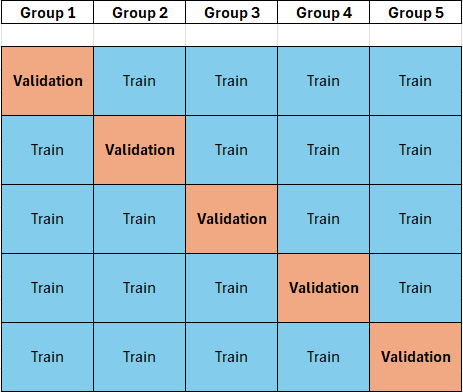

The mean squared error (MSE) is calculated for each fold, and the final $k$-fold CV estimate is obtained by averaging these values:

$$
\text{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^k \text{MSE}_i
$$

Empirically, it has been found that $k = 10$ provides a good balance between bias and variance, making it a common choice in practice.

- **Advantages**: Low computational demand, accurate performance estimation.
- **Disadvantages**: Small performance estimation samples, overlapping training data, underestimation of performance variation or overestimation of degrees of freedom.

**Leave-One-Out Cross-Validation (LOOCV)**

Leave-One-Out Cross-Validation (LOOCV) is a special case of K-Fold where $k$ is equal to the number of observations in the dataset. In each iteration, a single observation is used for validation, and the rest are used for training. Although the accuracy estimate obtained with LOOCV is nearly unbiased, its high variance can lead to unreliable estimates.

- **Advantages**: Unbiased performance estimation.
- **Disadvantages**: High computational demand, very high variance.

### Implementing k-Fold Cross-Validation for Linear Regression in `Python`

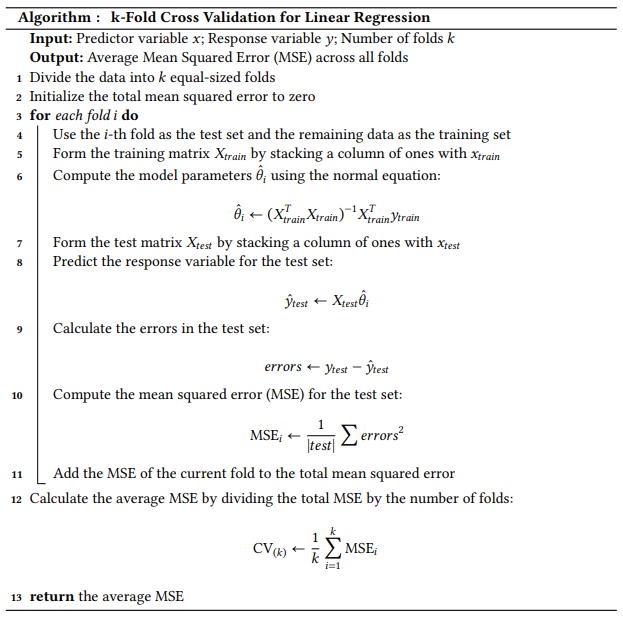

In [17]:
def cv_linear_regression(x, y, k):
    """
    Perform k-Fold Cross Validation for simple linear regression.
    
    Inputs:
        x (array-like): Predictor variable.
        y (array-like): Response variable.
        k (int): Number of folds.
    
    Returns:
        float: Average mean squared error across all folds.

    Author:
        Rodrigo J. Kang
    """
    N = len(y)  # Number of data points
    fold_size = int(N / k)  # Size of each fold
    mse_total = 0  # Total mean squared error
    
    # Perform k-Fold Cross Validation
    for i in range(k):
        # Indices for test and train data
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(N)) - set(test_indices))
        
        # Training data
        x_train = x[train_indices]
        y_train = y[train_indices]
        
        # Add intercept term to x_train
        X_train = np.vstack([np.ones(len(x_train)), x_train]).T
        
        # Compute theta (parameters)
        theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        
        # Test data
        x_test = x[test_indices]
        y_test = y[test_indices]
        
        # Add intercept term to x_test
        X_test = np.vstack([np.ones(len(x_test)), x_test]).T
        
        # Compute errors
        errors = y_test - X_test @ theta
        mse_total += np.mean(errors ** 2)
    
    # Calculate the average MSE
    average_mse = mse_total / k
    
    return average_mse

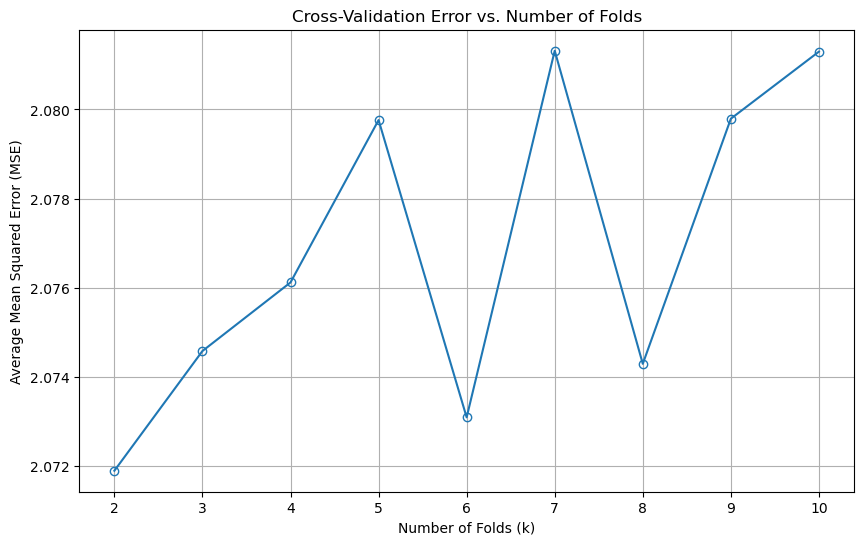

In [18]:
# List to store MSE values for different k
mse_values = []

# Compute the MSE for each value of k from 2 to 10
for k in range(2, 11):
    mse = cv_linear_regression(x, y, k)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), mse_values, marker='o', linestyle='-', markerfacecolor='none')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Mean Squared Error (MSE)')
plt.title('Cross-Validation Error vs. Number of Folds')
plt.grid(True)
plt.show()

In [19]:
# Get the average MSE
average_mse = cv_linear_regression(x, y, k)

print(f"Average Mean Squared Error (MSE): {average_mse}")

Average Mean Squared Error (MSE): 2.081296531213547


### Bootstrap Method

As previously discussed, a common problem in statistics involves estimating an unknown parameter $\theta$. Generally, the objective is to find an estimator $\hat{\theta}$, and once a particular $\hat{\theta}$ is chosen, determine its precision as an estimator of $\theta$. The bootstrap is a comprehensive methodology designed to address this second question. It serves as a powerful and versatile statistical tool to quantify the uncertainty associated with a given estimator or machine learning model. Instead of relying on extensive analytical calculations, the bootstrap leverages computational power.

This method can consistently tackle questions that are too intricate for traditional statistical analysis. Even for relatively straightforward problems, computationally intensive methods like the bootstrap are invaluable in enhancing data analysis, especially in an era of rapidly declining computational costs.

The general approach is as follows: Suppose we have a model fitted to a training dataset. Denote the training set by $D = (d_1, d_2, \ldots, d_N)$ where $d_i = (x_i, y_i)$. The fundamental idea is to randomly draw samples with replacement from the training data, each sample being the same size as the original training set. This process is repeated $B$ times (for example, $B = 100$), generating $B$ bootstrap datasets. The model is then refitted to each of these bootstrap datasets, and the behavior of the fits is analyzed across the $B$ replicates. Let $\hat{\alpha}$ represent any quantity calculated from the data $D$. Bootstrap sampling allows us to estimate various aspects of the distribution of $\hat{\alpha}$, such as its mean or variance. The following figure provides a schematic representation of the method:

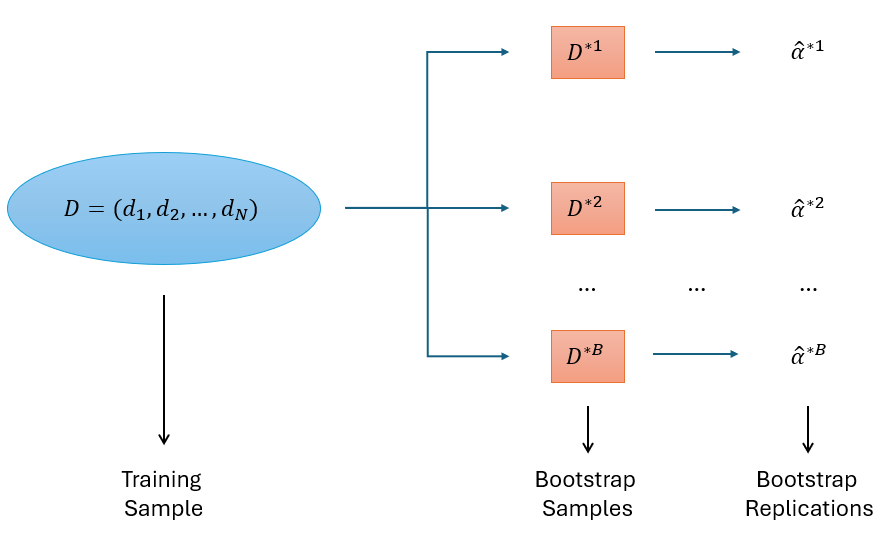

Bootstrap can be used to estimate the standard errors of the coefficients in a linear regression, although the real strength of the bootstrap lies in its adaptability to a wide range of machine learning methods, including some for which it is difficult to obtain a measure of variability.

### Implementing Bootstrap Method for Linear Regression in Python

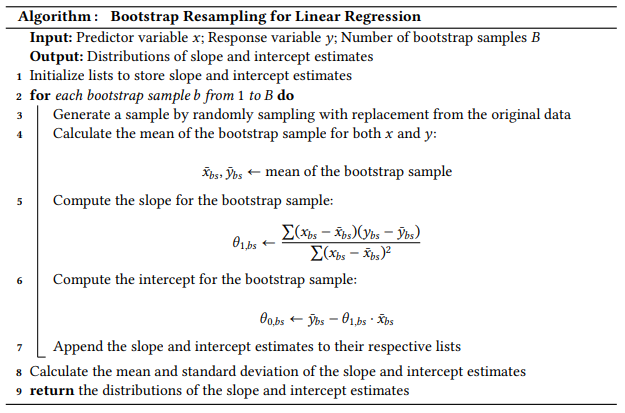

In [20]:
def bootstrap_regression(x, y, n_bootstrap=100):
    """
    Perform bootstrap resampling to estimate the slope and intercept 
    of a linear regression model.
    
    Inputs:
        x (numpy.ndarray): Array of predictor values.
        y (numpy.ndarray): Array of response values.
        n_bootstrap (int): Number of bootstrap samples to generate.

    Returns:
        np.ndarray: Array of bootstrap slope estimates.
        np.ndarray: Array of bootstrap intercept estimates.

    Author:
        Rodrigo J. Kang
    """
    slopes = []
    intercepts = []
    
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample
        indices = np.random.choice(len(x), len(x), replace=True)
        x_bootstrap = x[indices]
        y_bootstrap = y[indices]
        
        # Calculate the mean of the bootstrap samples
        x_bar_bootstrap = np.mean(x_bootstrap)
        y_bar_bootstrap = np.mean(y_bootstrap)
        
        # Calculate the slope and intercept for the bootstrap sample
        slope = np.dot(x_bootstrap - x_bar_bootstrap, y_bootstrap - 
                       y_bar_bootstrap) / np.linalg.norm(x_bootstrap - x_bar_bootstrap)**2
        intercept = y_bar_bootstrap - slope * x_bar_bootstrap
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    return np.array(slopes), np.array(intercepts)

In [21]:
# Perform bootstrap resampling
n_bootstrap_samples = 100
bootstrap_slopes, bootstrap_intercepts = bootstrap_regression(x, y, n_bootstrap_samples)

# Calculate statistics of the bootstrap estimates
slope_mean = np.mean(bootstrap_slopes)
slope_std = np.std(bootstrap_slopes)
intercept_mean = np.mean(bootstrap_intercepts)
intercept_std = np.std(bootstrap_intercepts)

print(f'Bootstrap slope mean: {slope_mean}')
print(f'Bootstrap slope standard deviation: {slope_std}')
print(f'Bootstrap intercept mean: {intercept_mean}')
print(f'Bootstrap intercept standard deviation: {intercept_std}')

Bootstrap slope mean: 2.038883975384422
Bootstrap slope standard deviation: 0.058389067635924136
Bootstrap intercept mean: 0.41223681477908625
Bootstrap intercept standard deviation: 0.04115910409837042


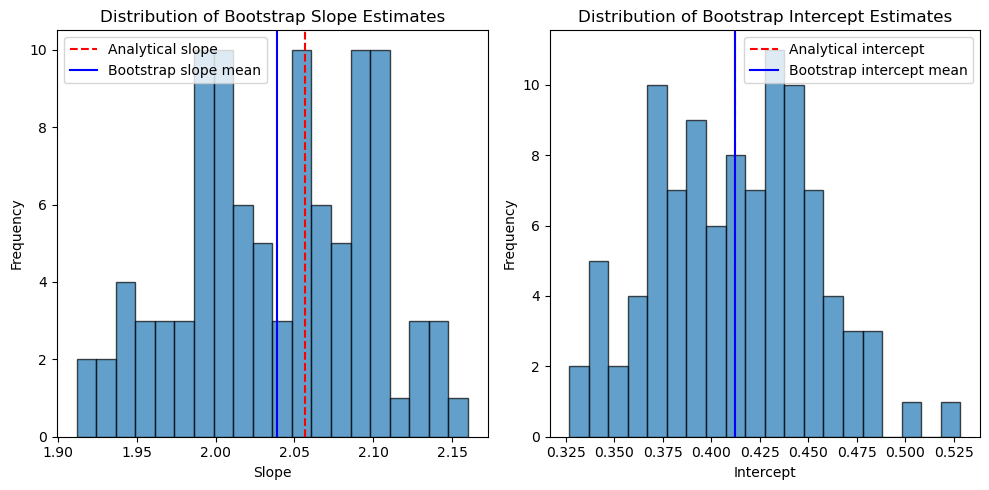

In [22]:
plt.figure(figsize=(10, 5))

# Plot distribution of bootstrap slope estimates
plt.subplot(1, 2, 1)
plt.hist(bootstrap_slopes, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=theta_1, color='red', linestyle='--', label='Analytical slope')
plt.axvline(x=slope_mean, color='blue', linestyle='-', label='Bootstrap slope mean')
plt.title('Distribution of Bootstrap Slope Estimates')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend()

# Plot distribution of bootstrap intercept estimates
plt.subplot(1, 2, 2)
plt.hist(bootstrap_intercepts, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=theta_0, color='red', linestyle='--', label='Analytical intercept')
plt.axvline(x=intercept_mean, color='blue', linestyle='-', label='Bootstrap intercept mean')
plt.title('Distribution of Bootstrap Intercept Estimates')
plt.xlabel('Intercept')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

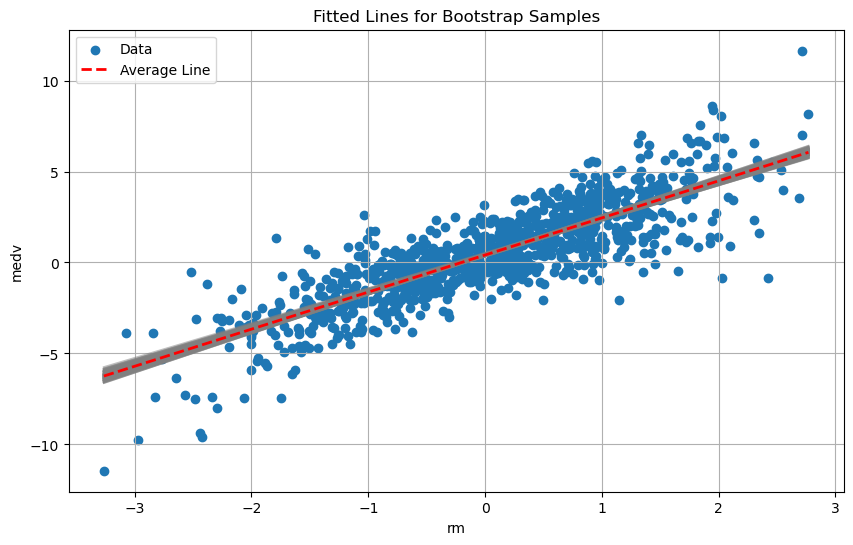

In [23]:
# Range of values for x
x_range = np.linspace(min(x), max(x), 100)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot all the fitted lines
for slope, intercept in zip(bootstrap_slopes, bootstrap_intercepts):
    y_pred = intercept + slope * x_range
    plt.plot(x_range, y_pred, color='grey', alpha=0.5)

# Plot the data
plt.scatter(x, y, marker='o', label='Data')

# Highlight the average line
average_intercept = np.mean(bootstrap_intercepts)
average_slope = np.mean(bootstrap_slopes)
y_pred_average = average_intercept + average_slope * x_range
plt.plot(x_range, y_pred_average, color='red', linestyle='--', linewidth=2, label='Average Line')

# Add labels and legend
plt.xlabel('rm')
plt.ylabel('medv')
plt.title('Fitted Lines for Bootstrap Samples')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Multiple Linear Regression

Linear Model for $M$ Predictors

$$
\begin{split}
Y & = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \cdots + \theta_M X_M \\
& = \sum_{i=1}^N \theta_0 + \sum_{j=1}^Mx_{ij}\theta_j
\end{split}
$$

The goal is to obtain the best estimation of the parameters $\theta_0$, $\theta_1$, $\dots$, $\theta_M$, denoted as $\hat{\theta}_0$, $\hat{\theta}_1$, $\dots$, $\hat{\theta}_M$. With these parameters, we can compute $\hat{f}(X)$ and make predictions about $Y$, represented by $\hat{Y} = \hat{f}(X)$.

If we have $N$ training data available, we can model these data linearly through the matrix relationship:

$$Y = X \boldsymbol{\theta} + \boldsymbol{\varepsilon}$$

where:

$$ Y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{bmatrix}, \, \,
X =
\begin{bmatrix}
1 & x_{11} & \cdots & x_{1M}\\
1 & x_{11} & \cdots & x_{1M} \\
\vdots & \vdots &  & \vdots \\
1 & x_{N1} & \cdots & x_{NM}\\
\end{bmatrix}, \, \,
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_M \\
\end{bmatrix}, \, \,
\boldsymbol{\varepsilon} =
\begin{bmatrix}
\varepsilon_0 \\
\varepsilon_1 \\
\vdots \\
\varepsilon_M \\
\end{bmatrix}
$$

This matrix approach simplifies computation and allows us to efficiently find optimal values for the model parameters.

## `Python` Implementation

### Ordinary Least Squares

**Residual Sum of Squares (RSS)**

$$
\mathbf{e} =
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_n \\
\end{bmatrix}
$$

$$
\begin{split}
\Rightarrow RSS & = \mathbf{e}^T \mathbf{e} = (Y - X \boldsymbol{\theta})^T(Y - X \boldsymbol{\theta}) \\
& = Y^TY - \boldsymbol{\theta}^TX^TY - Y^TX\boldsymbol{\theta} + \boldsymbol{\theta}^TX^TX \boldsymbol{\theta} \\
& = Y^TY - \left( Y^TX\boldsymbol{\theta} \right)^T - Y^TX\boldsymbol{\theta} + \boldsymbol{\theta}^TX^TX \boldsymbol{\theta} \\
& = Y^TY - 2 Y^TX\boldsymbol{\theta} + \boldsymbol{\theta}^TX^TX\boldsymbol{\theta}, \,\,\,\, \boldsymbol{\theta}^TX^TY\, \text{is scalar} \, (1 \times 1)
\end{split}
$$

**Critical Points**

$$
\begin{split}
\frac{\partial RSS}{\partial \boldsymbol{\theta}} & = \frac{\partial}{\partial \boldsymbol{\theta}} \left( Y^TY \right) - \frac{\partial}{\partial \boldsymbol{\theta}} \left[2 \left(X^TY\right)^T\boldsymbol{\theta}\right] + \frac{\partial}{\partial \boldsymbol{\theta}}\left(\boldsymbol{\theta}^TX^TX\boldsymbol{\theta}\right) \\
& = 0 - 2 X^TY + \left[ X^TX\boldsymbol{\theta} + \left( X^T X \right)^T\boldsymbol{\theta} \right] \\
& = -2 X^TY + 2X^TX\boldsymbol{\theta} \\
\end{split}
$$

**Note** To obtain the equation above we use the following properties:

- Let $A$ $1 \times N$ vector of scalars and $B$ $N \times 1$ vector of scalars. If $C = A^TB$ then $\frac{\partial C}{\partial B} = A$ (remember that the derivative with respect to a vector of a scalar is a vector)
- Let $A$ $N \times N$ matrix and $B$ $N \times 1$ vector of scalars. If $C = B^TAB$ then $\frac{\partial C}{\partial B} = AB + A^TB$ (remember that the derivative with respect to a vector of a scalar is a vector)

Therefore, setting to zero and solving for $\boldsymbol{\theta}$ yields:

$$
\boxed{
\hat{\boldsymbol{\theta}} = (X^TX)^{-1}X^TY
}
$$

### Parameter estimation in linear regression by maximum likelihood

While the least squares method is a common choice for estimating $\boldsymbol{\theta}$, an alternative approach is maximum likelihood estimation (MLE). This method aims to estimate the values of $\boldsymbol{\theta}$ under the assumption that $\mathbf{e}$ follows a normal distribution with mean $\boldsymbol{0}$ and variance $\sigma^2\mathbb{1}$ (homoscedasticity). To derive the MLE of $\boldsymbol{\theta}$, we begin by defining the likelihood function which in matrix notation takes the following form:

$$
L(\boldsymbol{\theta},\sigma^2|X) = \prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{exp}\left[ \frac{-\left( Y - X \boldsymbol{\theta} \right)^T\left( Y - X \boldsymbol{\theta} \right)}{2\sigma^2} \right]
$$

To simplify calculations it is convenient to maximize the logarithm of the likelihood:

$$
\mathrm{ln}L(\boldsymbol{\theta},\sigma^2|X) = -\frac{N}{2}\mathrm{ln}(2\pi) -\frac{N}{2}\mathrm{ln}(\sigma^2) - \frac{\left( Y - X \boldsymbol{\theta} \right)^T\left( Y - X \boldsymbol{\theta} \right)}{2\sigma^2}
$$

$$
\begin{split}
\frac{\partial \, \mathrm{ln}L(\boldsymbol{\theta},\sigma^2|X)}{\partial \boldsymbol{\theta}} & = \frac{\partial}{\partial \boldsymbol{\theta}} \left[ - \frac{\left( Y - X \boldsymbol{\theta} \right)^T\left( Y - X \boldsymbol{\theta} \right)}{2\sigma^2} \right] \\
& = \frac{\partial}{\partial \boldsymbol{\theta}} \left[ \frac{- Y^TY + 2 \left(X^TY\right)^T\boldsymbol{\theta} - \boldsymbol{\theta}^TX^TX\boldsymbol{\theta}}{2\sigma^2} \right] \\
& = \frac{2X^TY}{2\sigma^2} - \frac{X^TX\boldsymbol{\theta} + \left( X^TX \right)^T\boldsymbol{\theta}}{2\sigma^2} \\
& = \frac{X^TY - X^TX \boldsymbol{\theta}}{\sigma^2} = \boldsymbol{0}
\end{split}
$$

$$
\Rightarrow \boxed{\hat{\boldsymbol{\theta}} = (X^TX)^{-1}X^TY}
$$

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols

# Avoid code suggestions
import warnings
warnings.filterwarnings("ignore")

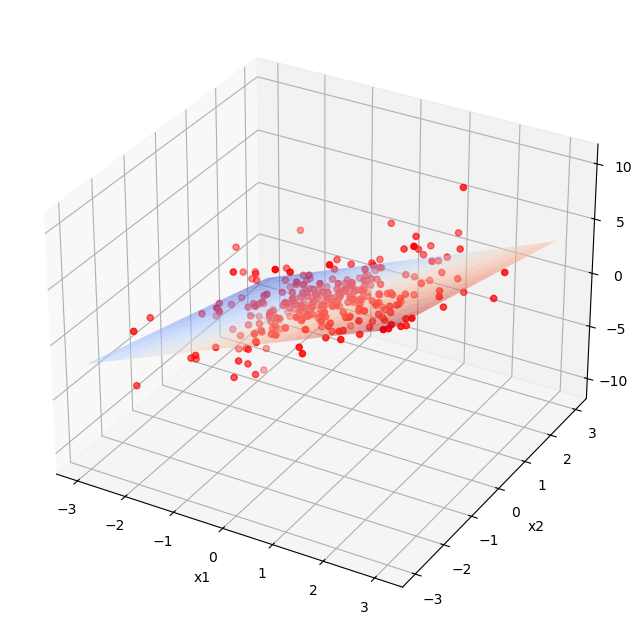

In [25]:
# Data Generation
N = 300
a = np.random.randn(1)
b = np.random.normal(loc=2, scale=1, size=N)
c = np.random.normal(loc=-1, scale=1, size=N)
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y = b * x1 + c * x2 + a + np.random.randn(N)

# Create a design matrix with a column of ones for the constant term
X = sm.add_constant(np.column_stack((x1, x2)))

# Create the linear model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Estimated coefficients
theta_0 = model.params[0]
theta_1 = model.params[1]
theta_2 = model.params[2]

# Create mesh for the fitting plane
x1_vals = np.linspace(-3, 3, 20)
x2_vals = np.linspace(-3, 3, 20)
x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
y_vals = theta_1 * x1_vals + theta_2 * x2_vals + theta_0

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data
ax.scatter(x1, x2, y, c='red', marker='o', label='Data')

# Fitting Plane
ax.plot_surface(x1_vals, x2_vals, y_vals, cmap='coolwarm', alpha=0.5, label='Fitting Plane')

# Axis Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

### Confidence intervals

Confidence intervals are crucial in statistical analysis as they provide a range of values within which we can be confident that the true population parameter lies. In linear regression analysis, confidence intervals are utilized to estimate the precision of the coefficients and predictions derived from the model.

**Residual Standard Error**

In order to construct a confidence interval it is necessary to know the dispersion of the random term $\sigma$. However, in general $\sigma$ is not known, but can be estimated from the data. This estimate of $\sigma$ is what is known as the **Residual Standard Error** or $\text{RSE}$ ($\hat{\sigma}$). $\text{RSE}$ is a fundamental measure in regression analysis and quantifies the dispersion of the observed values around the regression line and since said dispersion is given by $\text{RSS}$, under the assumptions of homoscedasticity (constant variance of errors) and independence of errors (uncorrelated), the unbiased estimate of the variance is obtained by dividing the sum of the squared residuals by $(n - M - 1)$, where $N$ is the number of observations and $M$ is the number of predictors (for the case ofsimple liner regression, there would be two degrees of freedom):

$$
\text{RSE} := \sqrt{\frac{\text{RSS}}{N - M - 1}} = \boldsymbol{\hat{\sigma}}
$$


To calculate the standard error let $A = \left(X^TX \right)^{-1}X^T$, then $\boldsymbol{\hat{\theta}} = AY$. Taking into account that the variance-covariance matrix for a random variable $Y$ denoted by $\boldsymbol{\sigma}^2_Y$ is defined as:

$$
\boldsymbol{\sigma}^2_Y = \text{E}\left[ (Y - \mu_Y)(Y - \mu_Y)^T \right]
$$

and the properties:

- $\text{E}\left[A\right] = A$
- $\text{E}\left[\boldsymbol{\hat{\theta}}\right] = \text{E}\left[AY\right] = A\text{E}\left[Y\right] $

where $A$ is a constant matrix, it can easily see that:

$$
\boldsymbol{\sigma}^2_\boldsymbol{\hat{\theta}} = \boldsymbol{\sigma}^2_{AY} = A \boldsymbol{\sigma}^2_Y A^T
$$

Since the components $y_1, y_2, \dots, y_3$ are independent, the variance-convariance matrix is diagonal, that is, $\boldsymbol{\sigma}^2_Y = \sigma^2\mathbb{1}_{N \times N}$. Then,

$$
\begin{split}
\boldsymbol{\sigma}^2_\boldsymbol{\hat{\theta}} & = \left( X^TX \right)^{-1}X^T\sigma^2\mathbb{1}_{N \times N}X\left( X^T X \right)^{-1} \\
& = \sigma^2\left( X^TX \right)^{-1}X^TX\left( X^TX \right)^{-1} \\
& = \sigma^2\left( X^TX \right)^{-1}
\end{split}
$$

So, the standard error of the set of parameters will be given by:

$$
\text{SE}(\hat{\boldsymbol{\theta}}) = \sigma^2(X^TX)^{-1} \sim \text{RSE} \cdot (X^TX)^{-1} = \sqrt{\frac{\text{RSS}}{N - M - 1}} \cdot (X^TX)^{-1}
$$

and this allows me to build **95%** confidence that the parameters are within twice the standard error of the respective parameter.

In [26]:
# Get regression results
results = model.summary()

# Print the table with coefficients, standard errors, and t-values
print(results.tables[1])

# Generate 95% confidence intervals for the coefficients
confidence_intervals = model.conf_int(alpha=0.05)

# Print confidence intervals
print("\n95% Confidence Intervals:")
print(confidence_intervals)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5897      0.108      5.469      0.000       0.378       0.802
x1             1.8445      0.105     17.547      0.000       1.638       2.051
x2            -0.9535      0.110     -8.667      0.000      -1.170      -0.737

95% Confidence Intervals:
[[ 0.37754136  0.80194392]
 [ 1.63759389  2.05132108]
 [-1.16998697 -0.73698442]]


### Analysis of Variance (ANOVA) to assessing the multiple linear regression model

We can conduct a hypothesis test to evaluate our model:

$$
\left\{
\begin{array}{l}
H_0: \theta_1 = \theta_2 = \cdots = \theta_M = 0 \\
\\
H_1: \text{at least one} \; \theta_j \neq 0
\end{array} \right.
$$

To do this, we perform an $F$-test based on the $F$ statistic:

$$
F = \frac{(\text{TSS} - \text{RSS})/M}{\text{RSS}/(N - M - 1)}
$$

When there is no relationship between the response variable and the predictors, one would expect the $F$ statistic to take a value close to 1. Conversely, if $H_1$ is true, we expect $F$ to be greater than 1. This can be determined using the $\mathrm{p-value}$ and the significance level $\alpha$ (which can be context-dependent, such as $0.03$ or $0.05$).

Sometimes, we want to test that a particular subset $Q$ of the coefficients is zero.

This corresponds to a null hypothesis.

$$H_0: \theta_{M-Q+1} = \theta_{M-Q+2} = \cdots = \theta_M = 0$$

In this case, we find a second model that uses all variables except the last $Q$. Suppose the sum of squared residuals for that model is $\text{RSS}_0$. Then the appropriate $F$ statistic is:

$$F=\frac{(\text{RSS}_0 - \text{RSS})/Q}{\text{RSS}/(N - M - 1)}$$

**F-test**

1. **F-statistic (F-value)**:
- The F-statistic compares the amount of variation explained by a specific predictor to the amount of unexplained variation, adjusted for the number of degrees of freedom. A high F-value indicates that the predictor explains a significant portion of the variation in the dependent variable.

2. **p-value (p-value)**:
- The p-value associated with the F-statistic allows you to determine whether you can reject the null hypothesis that the predictor's coefficient is equal to zero (i.e., that the predictor has no significant effect on the dependent variable). A small p-value (usually less than 0.05) indicates that you can reject the null hypothesis and conclude that the predictor is significant.

3. **Degrees of freedom (df_denom and df_num)**:
- `df_num` (numerator) is the number of restrictions imposed, which in this case is 1 because we want to test each coefficient individually.
- `df_denom` (denominator) is the number of observations minus the number of parameters in the model minus one.

In [27]:
# Get the F-statistic and p-value for the F-test
f_statistic = model.fvalue
p_value_f = model.f_pvalue

print("F-statistic:", f_statistic)
print("p-value for F-test:", p_value_f)

F-statistic: 181.40800864983325
p-value for F-test: 3.311607846978886e-52


In [28]:
# Create a DataFrame
data = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(data)

# Fit the model
model = ols('y ~ x1 + x2', data=df).fit()

# Perform Fisher's F-tests for each parameter separately
f_test_beta_0 = model.f_test("Intercept = 0")
f_test_beta_1 = model.f_test("x1 = 0")
f_test_beta_2 = model.f_test("x2 = 0")

print("F-test for beta_0:")
print(f_test_beta_0.summary())

print("F-test for beta_1:")
print(f_test_beta_1.summary())

print("F-test for beta_2:")
print(f_test_beta_2.summary())

F-test for beta_0:
<F test: F=29.91382689552876, p=9.595678310070685e-08, df_denom=297, df_num=1>
F-test for beta_1:
<F test: F=307.90169882213803, p=8.601652740191087e-48, df_denom=297, df_num=1>
F-test for beta_2:
<F test: F=75.11909508321253, p=2.918493917081308e-16, df_denom=297, df_num=1>


### Assessing and Selecting the Best Model

### k-Fold Cross-Validation for Multiple Linear Regression

In [29]:
# Importing necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
# Implementing k-Fold Cross Validation using scikit-learn
def cv_linear_regression(X, y, k):
    """
    Perform k-Fold Cross Validation for multiple linear regression using scikit-learn.
    
    Parameters:
    X (array-like): Design matrix including predictor variables.
    y (array-like): Response variable.
    k (int): Number of folds.
    
    Returns:
    float: Average mean squared error across all folds.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_total = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_total += mse
    
    average_mse = mse_total / k
    return average_mse

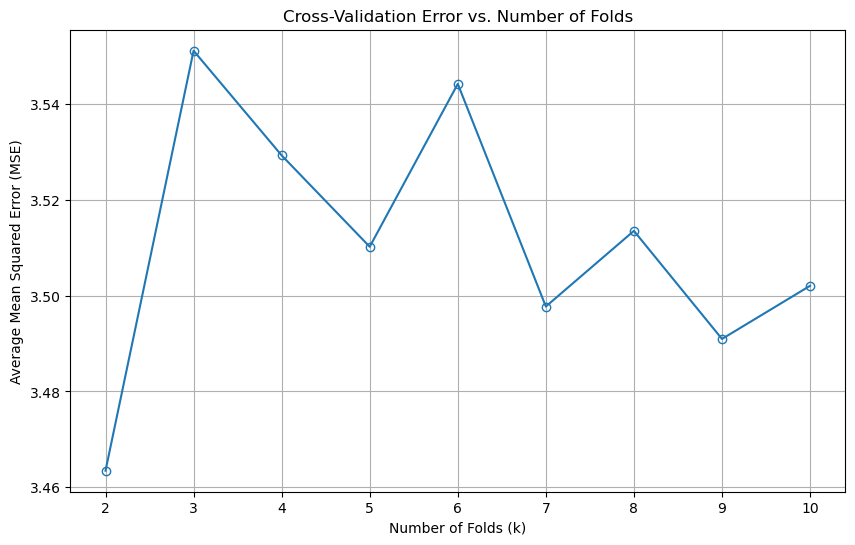

In [31]:
# List to store MSE values for different k
mse_values = []

# Compute the MSE for each value of k from 2 to 10
for k in range(2, 11):
    mse = cv_linear_regression(X, y, k)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), mse_values, marker='o', linestyle='-', markerfacecolor='none')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Mean Squared Error (MSE)')
plt.title('Cross-Validation Error vs. Number of Folds')
plt.grid(True)
plt.show()

In [32]:
# Get the average MSE
average_mse = cv_linear_regression(X, y, k=10)

print(f"Average Mean Squared Error (MSE): {average_mse}")

Average Mean Squared Error (MSE): 3.50204924826006


### Bootstrap Method for Linear Regression

In [33]:
# Importing necessary libraries
from sklearn.utils import resample

In [34]:
def bootstrap_regression(X, y, n_bootstrap=100):
    """
    Perform bootstrap resampling to estimate the coefficients 
    of a multiple linear regression model using scikit-learn.
    
    Parameters:
    X (numpy.ndarray): Array of predictor values.
    y (numpy.ndarray): Array of response values.
    n_bootstrap (int): Number of bootstrap samples to generate.

    Returns:
    np.ndarray: Array of bootstrap coefficient estimates.
    np.ndarray: Array of bootstrap intercept estimates.
    """
    coefs = []
    intercepts = []
    
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y)
        
        # Fit the linear regression model
        model = LinearRegression().fit(X_bootstrap, y_bootstrap)
        
        # Extract the coefficients and intercept
        coef = model.coef_
        intercept = model.intercept_
        
        coefs.append(coef)
        intercepts.append(intercept)
    
    return np.array(coefs), np.array(intercepts)

In [35]:
# Perform bootstrap resampling
n_bootstrap_samples = 100
bootstrap_coefs, bootstrap_intercepts = bootstrap_regression(X, y, n_bootstrap_samples)

# Calculate statistics of the bootstrap estimates
coefs_mean = np.mean(bootstrap_coefs, axis=0)
coefs_std = np.std(bootstrap_coefs, axis=0)
intercept_mean = np.mean(bootstrap_intercepts)
intercept_std = np.std(bootstrap_intercepts)

print(f'Bootstrap coefficient means: {coefs_mean}')
print(f'Bootstrap coefficient standard deviations: {coefs_std}')
print(f'Bootstrap intercept mean: {intercept_mean}')
print(f'Bootstrap intercept standard deviation: {intercept_std}')

Bootstrap coefficient means: [ 0.          1.84660729 -0.97913874]
Bootstrap coefficient standard deviations: [0.         0.13103837 0.14022915]
Bootstrap intercept mean: 0.5751399201768685
Bootstrap intercept standard deviation: 0.09703422474577082


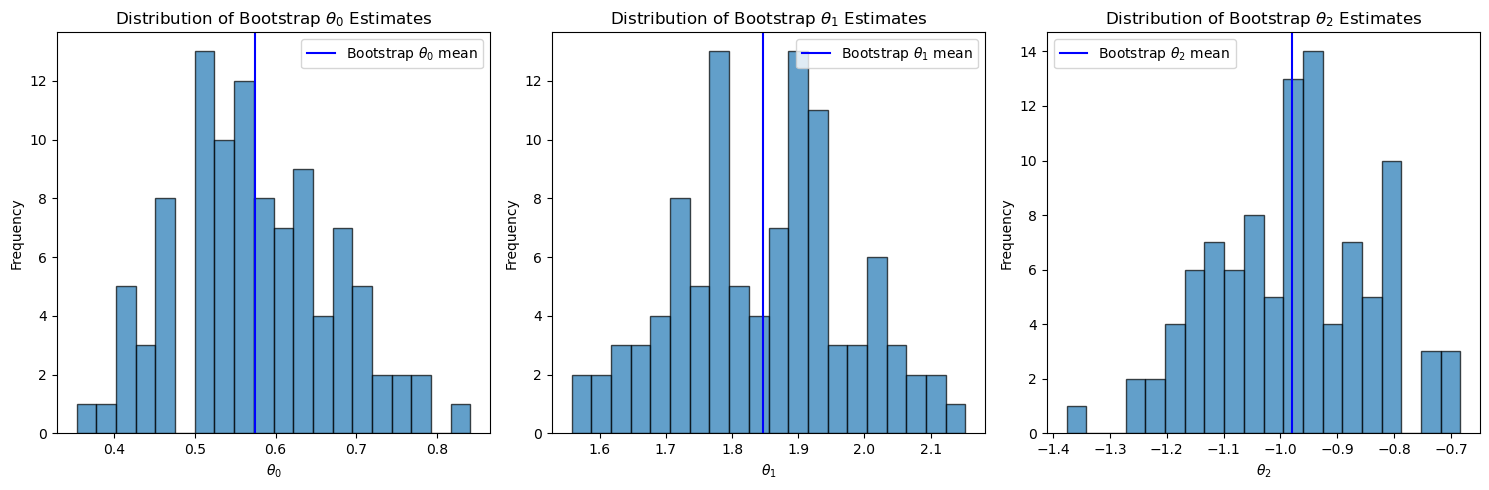

In [36]:
# Plotting the distributions
plt.figure(figsize=(15, 5))

# Plot distribution of bootstrap intercept estimates (θ₀)
plt.subplot(1, 3, 1)
plt.hist(bootstrap_intercepts, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=intercept_mean, color='blue', linestyle='-', label=r'Bootstrap $\theta_0$ mean')
plt.title(r'Distribution of Bootstrap $\theta_0$ Estimates')
plt.xlabel(r'$\theta_0$')
plt.ylabel('Frequency')
plt.legend()

# Plot distribution of bootstrap coefficient estimates for θ₁
plt.subplot(1, 3, 2)
plt.hist(bootstrap_coefs[:, 1], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=coefs_mean[1], color='blue', linestyle='-', label=r'Bootstrap $\theta_1$ mean')
plt.title(r'Distribution of Bootstrap $\theta_1$ Estimates')
plt.xlabel(r'$\theta_1$')
plt.ylabel('Frequency')
plt.legend()

# Plot distribution of bootstrap coefficient estimates for θ₂
plt.subplot(1, 3, 3)
plt.hist(bootstrap_coefs[:, 2], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=coefs_mean[2], color='blue', linestyle='-', label=r'Bootstrap $\theta_2$ mean')
plt.title(r'Distribution of Bootstrap $\theta_2$ Estimates')
plt.xlabel(r'$\theta_2$')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
